In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [4]:
%load_ext autoreload
%autoreload 2
%run '../../main.py'

In [5]:
dataSetOps = DataSetOps()

mul = 10000

dataSetOps.import_years(2015, 2017)
dataSetOps.df['max'] = dataSetOps.df['max'] * mul
dataSetOps.df['min'] = dataSetOps.df['min'] * mul
dataSetOps.df['open'] = dataSetOps.df['open'] * mul
dataSetOps.df['price'] = dataSetOps.df['price'] * mul

dataSetOps.prepare()


df = dataSetOps.df

In [139]:
# print(df)
# variables
mavglar = [10, 30, 50, 70]
window = 30
spread = 1.5
epilson = spread * mul / 10000
epilsonWin = epilson * 10;

In [140]:
df['value_pattern'] = True
for mavgl in mavglar:
    mavgl = str(mavgl)
    df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window).rolling(window=50).mean()
    df['value_pattern'] = df['value_pattern'] & (df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson)
    #df[['price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()
    
    
df['f_price'] = df['price'].shift(-window).rolling(window=window).max()
df['value'] = df['f_price'] - df['price'] > epilsonWin

In [141]:
df = df[df['value_pattern']]

In [142]:
#df = df.append(df[df['value']])

pattern total prob 66.70234400085626 %
28029
18696


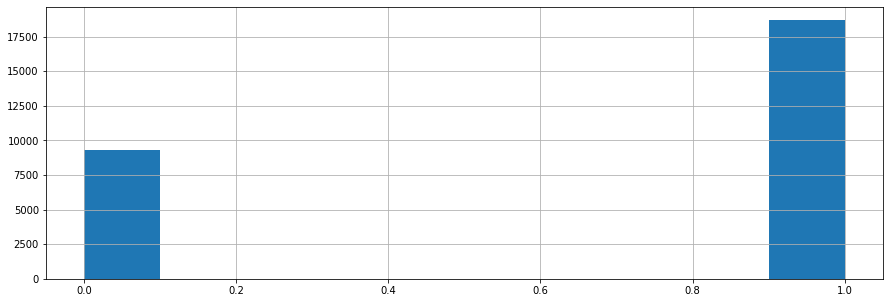

In [143]:
df['value'].astype(int).hist()
print('pattern total prob', (len(df[df['value']]) / (len(df))) * 100, '%')
print(len(df))
print(len(df[df['value']]))

In [144]:
X = df[['price', 'mavg10', 'mavg20', 'mavg50', 'mavg80', 'mavg100', 'mavg1000']]
Y = df['value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
import keras
import tensorflow as tf


config = tf.ConfigProto( device_count = {'GPU': 0} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

    
#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add( Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 7))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))

classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'sigmoid'))

classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae, 'accuracy']
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)


# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 20, epochs = 70000)
import random
classifier.save("/tmp/mavg_classifier_" + str(random.randint(100000, 999999)))

/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=64, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  del sys.path[0]
/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=64, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
/home/taleh

Epoch 1/70000
25226/25226 [==============================] - 1s 57us/step - loss: 0.2220 - mean_absolute_error: 0.4436 - acc: 0.6658
Epoch 2/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.2216 - mean_absolute_error: 0.4425 - acc: 0.6658
Epoch 3/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.2214 - mean_absolute_error: 0.4422 - acc: 0.6658
Epoch 4/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.2214 - mean_absolute_error: 0.4426 - acc: 0.6658
Epoch 5/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.2212 - mean_absolute_error: 0.4421 - acc: 0.6658
Epoch 6/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.2212 - mean_absolute_error: 0.4417 - acc: 0.6658
Epoch 7/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.2207 - mean_absolute_error: 0.4412 - acc: 0.6658
Epoch 8/70000
25226/25226 [==============================] - 1s 37us/

25226/25226 [==============================] - 1s 37us/step - loss: 0.1947 - mean_absolute_error: 0.3885 - acc: 0.6860
Epoch 124/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1945 - mean_absolute_error: 0.3891 - acc: 0.6840
Epoch 125/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1946 - mean_absolute_error: 0.3898 - acc: 0.6866
Epoch 126/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1948 - mean_absolute_error: 0.3893 - acc: 0.6868
Epoch 127/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1945 - mean_absolute_error: 0.3890 - acc: 0.6855
Epoch 128/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1945 - mean_absolute_error: 0.3895 - acc: 0.6846
Epoch 129/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1931 - mean_absolute_error: 0.3863 - acc: 0.6883
Epoch 130/70000
25226/25226 [==============================] - 1s 37us/

25226/25226 [==============================] - 1s 37us/step - loss: 0.1870 - mean_absolute_error: 0.3740 - acc: 0.7025
Epoch 244/70000
25226/25226 [==============================] - 1s 35us/step - loss: 0.1860 - mean_absolute_error: 0.3721 - acc: 0.7020
Epoch 245/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1851 - mean_absolute_error: 0.3705 - acc: 0.7045
Epoch 246/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1848 - mean_absolute_error: 0.3697 - acc: 0.7057
Epoch 247/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1853 - mean_absolute_error: 0.3707 - acc: 0.7017
Epoch 248/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1856 - mean_absolute_error: 0.3707 - acc: 0.7052
Epoch 249/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1858 - mean_absolute_error: 0.3702 - acc: 0.7061
Epoch 250/70000
25226/25226 [==============================] - 1s 42us/

25226/25226 [==============================] - 1s 38us/step - loss: 0.1787 - mean_absolute_error: 0.3570 - acc: 0.7174
Epoch 364/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1784 - mean_absolute_error: 0.3574 - acc: 0.7171
Epoch 365/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1779 - mean_absolute_error: 0.3567 - acc: 0.7202
Epoch 366/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1785 - mean_absolute_error: 0.3569 - acc: 0.7183
Epoch 367/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1777 - mean_absolute_error: 0.3556 - acc: 0.7178
Epoch 368/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1779 - mean_absolute_error: 0.3559 - acc: 0.7189
Epoch 369/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1784 - mean_absolute_error: 0.3563 - acc: 0.7177
Epoch 370/70000
25226/25226 [==============================] - 1s 37us/

25226/25226 [==============================] - 1s 37us/step - loss: 0.1688 - mean_absolute_error: 0.3375 - acc: 0.7362
Epoch 484/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1700 - mean_absolute_error: 0.3390 - acc: 0.7346
Epoch 485/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1696 - mean_absolute_error: 0.3390 - acc: 0.7325
Epoch 486/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1685 - mean_absolute_error: 0.3373 - acc: 0.7370
Epoch 487/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1687 - mean_absolute_error: 0.3378 - acc: 0.7358
Epoch 488/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1690 - mean_absolute_error: 0.3381 - acc: 0.7379
Epoch 489/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1690 - mean_absolute_error: 0.3376 - acc: 0.7374
Epoch 490/70000
25226/25226 [==============================] - 1s 38us/

25226/25226 [==============================] - 1s 38us/step - loss: 0.1599 - mean_absolute_error: 0.3193 - acc: 0.7523
Epoch 604/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1611 - mean_absolute_error: 0.3200 - acc: 0.7518
Epoch 605/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1603 - mean_absolute_error: 0.3199 - acc: 0.7549
Epoch 606/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1613 - mean_absolute_error: 0.3203 - acc: 0.7491
Epoch 607/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1594 - mean_absolute_error: 0.3190 - acc: 0.7531
Epoch 608/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1604 - mean_absolute_error: 0.3198 - acc: 0.7524
Epoch 609/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1606 - mean_absolute_error: 0.3194 - acc: 0.7518
Epoch 610/70000
25226/25226 [==============================] - 1s 38us/

25226/25226 [==============================] - 1s 40us/step - loss: 0.1534 - mean_absolute_error: 0.3036 - acc: 0.7646
Epoch 724/70000
25226/25226 [==============================] - 1s 58us/step - loss: 0.1511 - mean_absolute_error: 0.3021 - acc: 0.7677
Epoch 725/70000
25226/25226 [==============================] - 2s 67us/step - loss: 0.1540 - mean_absolute_error: 0.3057 - acc: 0.7614
Epoch 726/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1525 - mean_absolute_error: 0.3037 - acc: 0.7657
Epoch 727/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1523 - mean_absolute_error: 0.3031 - acc: 0.7683
Epoch 728/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1519 - mean_absolute_error: 0.3028 - acc: 0.7664
Epoch 729/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1521 - mean_absolute_error: 0.3023 - acc: 0.7643
Epoch 730/70000
25226/25226 [==============================] - 1s 40us/

25226/25226 [==============================] - 1s 38us/step - loss: 0.1462 - mean_absolute_error: 0.2895 - acc: 0.7783
Epoch 844/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1463 - mean_absolute_error: 0.2906 - acc: 0.7769
Epoch 845/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1459 - mean_absolute_error: 0.2910 - acc: 0.7784
Epoch 846/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1472 - mean_absolute_error: 0.2921 - acc: 0.7771
Epoch 847/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1459 - mean_absolute_error: 0.2899 - acc: 0.7790
Epoch 848/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1454 - mean_absolute_error: 0.2884 - acc: 0.7792
Epoch 849/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1470 - mean_absolute_error: 0.2897 - acc: 0.7738
Epoch 850/70000
25226/25226 [==============================] - 1s 38us/

25226/25226 [==============================] - 1s 51us/step - loss: 0.1398 - mean_absolute_error: 0.2762 - acc: 0.7919
Epoch 964/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.1394 - mean_absolute_error: 0.2764 - acc: 0.7910
Epoch 965/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.1431 - mean_absolute_error: 0.2782 - acc: 0.7865
Epoch 966/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1401 - mean_absolute_error: 0.2764 - acc: 0.7883
Epoch 967/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1400 - mean_absolute_error: 0.2770 - acc: 0.7868
Epoch 968/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1403 - mean_absolute_error: 0.2777 - acc: 0.7873
Epoch 969/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1387 - mean_absolute_error: 0.2750 - acc: 0.7914
Epoch 970/70000
25226/25226 [==============================] - 1s 48us/

25226/25226 [==============================] - 1s 39us/step - loss: 0.1346 - mean_absolute_error: 0.2657 - acc: 0.7991
Epoch 1084/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1344 - mean_absolute_error: 0.2654 - acc: 0.7983
Epoch 1085/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1334 - mean_absolute_error: 0.2646 - acc: 0.7993
Epoch 1086/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1356 - mean_absolute_error: 0.2664 - acc: 0.7963
Epoch 1087/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1360 - mean_absolute_error: 0.2674 - acc: 0.7962
Epoch 1088/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1343 - mean_absolute_error: 0.2645 - acc: 0.8006
Epoch 1089/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1352 - mean_absolute_error: 0.2660 - acc: 0.7970
Epoch 1090/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 40us/step - loss: 0.1311 - mean_absolute_error: 0.2581 - acc: 0.8073
Epoch 1204/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1322 - mean_absolute_error: 0.2588 - acc: 0.8049
Epoch 1205/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1302 - mean_absolute_error: 0.2564 - acc: 0.8058
Epoch 1206/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1310 - mean_absolute_error: 0.2572 - acc: 0.8043
Epoch 1207/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1310 - mean_absolute_error: 0.2576 - acc: 0.8065
Epoch 1208/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1316 - mean_absolute_error: 0.2580 - acc: 0.8031
Epoch 1209/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1308 - mean_absolute_error: 0.2572 - acc: 0.8058
Epoch 1210/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 38us/step - loss: 0.1286 - mean_absolute_error: 0.2521 - acc: 0.8090
Epoch 1324/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1284 - mean_absolute_error: 0.2509 - acc: 0.8114
Epoch 1325/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1271 - mean_absolute_error: 0.2488 - acc: 0.8132
Epoch 1326/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1279 - mean_absolute_error: 0.2507 - acc: 0.8112
Epoch 1327/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1286 - mean_absolute_error: 0.2519 - acc: 0.8101
Epoch 1328/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1280 - mean_absolute_error: 0.2506 - acc: 0.8120
Epoch 1329/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1275 - mean_absolute_error: 0.2496 - acc: 0.8090
Epoch 1330/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.1265 - mean_absolute_error: 0.2461 - acc: 0.8127
Epoch 1444/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1251 - mean_absolute_error: 0.2454 - acc: 0.8168
Epoch 1445/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1254 - mean_absolute_error: 0.2454 - acc: 0.8161
Epoch 1446/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1254 - mean_absolute_error: 0.2451 - acc: 0.8129
Epoch 1447/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1246 - mean_absolute_error: 0.2446 - acc: 0.8180
Epoch 1448/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1265 - mean_absolute_error: 0.2466 - acc: 0.8136
Epoch 1449/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1280 - mean_absolute_error: 0.2482 - acc: 0.8086
Epoch 1450/70000
25226/25226 [==============================] - 1

Epoch 1563/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1231 - mean_absolute_error: 0.2412 - acc: 0.8192
Epoch 1564/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1233 - mean_absolute_error: 0.2416 - acc: 0.8190
Epoch 1565/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1227 - mean_absolute_error: 0.2401 - acc: 0.8208
Epoch 1566/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1250 - mean_absolute_error: 0.2419 - acc: 0.8165
Epoch 1567/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1242 - mean_absolute_error: 0.2418 - acc: 0.8187
Epoch 1568/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1222 - mean_absolute_error: 0.2395 - acc: 0.8220
Epoch 1569/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1230 - mean_absolute_error: 0.2397 - acc: 0.8220
Epoch 1570/70000
25226/25226 [==================

25226/25226 [==============================] - 1s 41us/step - loss: 0.1219 - mean_absolute_error: 0.2368 - acc: 0.8234
Epoch 1684/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1208 - mean_absolute_error: 0.2357 - acc: 0.8249
Epoch 1685/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1222 - mean_absolute_error: 0.2375 - acc: 0.8224
Epoch 1686/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1219 - mean_absolute_error: 0.2375 - acc: 0.8212
Epoch 1687/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1196 - mean_absolute_error: 0.2336 - acc: 0.8276
Epoch 1688/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1230 - mean_absolute_error: 0.2379 - acc: 0.8231
Epoch 1689/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1234 - mean_absolute_error: 0.2396 - acc: 0.8226
Epoch 1690/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 36us/step - loss: 0.1193 - mean_absolute_error: 0.2308 - acc: 0.8279
Epoch 1804/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1207 - mean_absolute_error: 0.2337 - acc: 0.8255
Epoch 1805/70000
25226/25226 [==============================] - 1s 35us/step - loss: 0.1179 - mean_absolute_error: 0.2302 - acc: 0.8288
Epoch 1806/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1193 - mean_absolute_error: 0.2334 - acc: 0.8272
Epoch 1807/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1183 - mean_absolute_error: 0.2310 - acc: 0.8303
Epoch 1808/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1190 - mean_absolute_error: 0.2311 - acc: 0.8285
Epoch 1809/70000
25226/25226 [==============================] - 1s 35us/step - loss: 0.1227 - mean_absolute_error: 0.2350 - acc: 0.8219
Epoch 1810/70000
25226/25226 [==============================] - 1

Epoch 1923/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1164 - mean_absolute_error: 0.2274 - acc: 0.8310
Epoch 1924/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1150 - mean_absolute_error: 0.2255 - acc: 0.8337
Epoch 1925/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1204 - mean_absolute_error: 0.2312 - acc: 0.8254
Epoch 1926/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1180 - mean_absolute_error: 0.2286 - acc: 0.8301
Epoch 1927/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1177 - mean_absolute_error: 0.2291 - acc: 0.8309
Epoch 1928/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1183 - mean_absolute_error: 0.2293 - acc: 0.8274
Epoch 1929/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1168 - mean_absolute_error: 0.2275 - acc: 0.8320
Epoch 1930/70000
25226/25226 [==================

25226/25226 [==============================] - 1s 36us/step - loss: 0.1164 - mean_absolute_error: 0.2254 - acc: 0.8328
Epoch 2044/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1188 - mean_absolute_error: 0.2282 - acc: 0.8279
Epoch 2045/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1204 - mean_absolute_error: 0.2302 - acc: 0.8272
Epoch 2046/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1172 - mean_absolute_error: 0.2266 - acc: 0.8320
Epoch 2047/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1172 - mean_absolute_error: 0.2270 - acc: 0.8310
Epoch 2048/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1153 - mean_absolute_error: 0.2239 - acc: 0.8347
Epoch 2049/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1165 - mean_absolute_error: 0.2252 - acc: 0.8315
Epoch 2050/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 38us/step - loss: 0.1158 - mean_absolute_error: 0.2248 - acc: 0.8333
Epoch 2164/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1154 - mean_absolute_error: 0.2240 - acc: 0.8342
Epoch 2165/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1144 - mean_absolute_error: 0.2226 - acc: 0.8372
Epoch 2166/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1151 - mean_absolute_error: 0.2238 - acc: 0.8347
Epoch 2167/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1140 - mean_absolute_error: 0.2226 - acc: 0.8367
Epoch 2168/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1155 - mean_absolute_error: 0.2236 - acc: 0.8340
Epoch 2169/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1178 - mean_absolute_error: 0.2257 - acc: 0.8313
Epoch 2170/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 37us/step - loss: 0.1117 - mean_absolute_error: 0.2194 - acc: 0.8396
Epoch 2284/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1133 - mean_absolute_error: 0.2202 - acc: 0.8373
Epoch 2285/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1172 - mean_absolute_error: 0.2237 - acc: 0.8323
Epoch 2286/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1133 - mean_absolute_error: 0.2202 - acc: 0.8379
Epoch 2287/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1154 - mean_absolute_error: 0.2232 - acc: 0.8333
Epoch 2288/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1154 - mean_absolute_error: 0.2227 - acc: 0.8360
Epoch 2289/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1136 - mean_absolute_error: 0.2205 - acc: 0.8356
Epoch 2290/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 40us/step - loss: 0.1166 - mean_absolute_error: 0.2222 - acc: 0.8320
Epoch 2404/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1137 - mean_absolute_error: 0.2187 - acc: 0.8351
Epoch 2405/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1150 - mean_absolute_error: 0.2220 - acc: 0.8346
Epoch 2406/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1150 - mean_absolute_error: 0.2204 - acc: 0.8345
Epoch 2407/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1123 - mean_absolute_error: 0.2186 - acc: 0.8376
Epoch 2408/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1114 - mean_absolute_error: 0.2179 - acc: 0.8385
Epoch 2409/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1143 - mean_absolute_error: 0.2202 - acc: 0.8355
Epoch 2410/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 40us/step - loss: 0.1120 - mean_absolute_error: 0.2171 - acc: 0.8379
Epoch 2524/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1153 - mean_absolute_error: 0.2205 - acc: 0.8346
Epoch 2525/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1098 - mean_absolute_error: 0.2143 - acc: 0.8432
Epoch 2526/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1120 - mean_absolute_error: 0.2173 - acc: 0.8385
Epoch 2527/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1156 - mean_absolute_error: 0.2214 - acc: 0.8351
Epoch 2528/70000
25226/25226 [==============================] - 2s 72us/step - loss: 0.1106 - mean_absolute_error: 0.2156 - acc: 0.8404
Epoch 2529/70000
25226/25226 [==============================] - 2s 75us/step - loss: 0.1117 - mean_absolute_error: 0.2171 - acc: 0.8396
Epoch 2530/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 38us/step - loss: 0.1125 - mean_absolute_error: 0.2168 - acc: 0.8381
Epoch 2644/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1097 - mean_absolute_error: 0.2122 - acc: 0.8430
Epoch 2645/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1116 - mean_absolute_error: 0.2148 - acc: 0.8410
Epoch 2646/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1108 - mean_absolute_error: 0.2136 - acc: 0.8440
Epoch 2647/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1101 - mean_absolute_error: 0.2134 - acc: 0.8456
Epoch 2648/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1105 - mean_absolute_error: 0.2135 - acc: 0.8408
Epoch 2649/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1139 - mean_absolute_error: 0.2171 - acc: 0.8375
Epoch 2650/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 37us/step - loss: 0.1122 - mean_absolute_error: 0.2152 - acc: 0.8389
Epoch 2764/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1106 - mean_absolute_error: 0.2134 - acc: 0.8437
Epoch 2765/70000
25226/25226 [==============================] - 1s 36us/step - loss: 0.1089 - mean_absolute_error: 0.2107 - acc: 0.8463
Epoch 2766/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1094 - mean_absolute_error: 0.2114 - acc: 0.8427
Epoch 2767/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1127 - mean_absolute_error: 0.2155 - acc: 0.8376
Epoch 2768/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1108 - mean_absolute_error: 0.2140 - acc: 0.8408
Epoch 2769/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1110 - mean_absolute_error: 0.2129 - acc: 0.8428
Epoch 2770/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 38us/step - loss: 0.1109 - mean_absolute_error: 0.2129 - acc: 0.8409
Epoch 2884/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1095 - mean_absolute_error: 0.2120 - acc: 0.8427
Epoch 2885/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1103 - mean_absolute_error: 0.2121 - acc: 0.8415
Epoch 2886/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1071 - mean_absolute_error: 0.2084 - acc: 0.8467
Epoch 2887/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1157 - mean_absolute_error: 0.2180 - acc: 0.8336
Epoch 2888/70000
25226/25226 [==============================] - 2s 67us/step - loss: 0.1108 - mean_absolute_error: 0.2124 - acc: 0.8401
Epoch 2889/70000
25226/25226 [==============================] - 2s 82us/step - loss: 0.1090 - mean_absolute_error: 0.2119 - acc: 0.8437
Epoch 2890/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 42us/step - loss: 0.1130 - mean_absolute_error: 0.2133 - acc: 0.8398
Epoch 3004/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1065 - mean_absolute_error: 0.2065 - acc: 0.8494
Epoch 3005/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1104 - mean_absolute_error: 0.2103 - acc: 0.8427
Epoch 3006/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1090 - mean_absolute_error: 0.2092 - acc: 0.8459
Epoch 3007/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1106 - mean_absolute_error: 0.2113 - acc: 0.8427
Epoch 3008/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1099 - mean_absolute_error: 0.2100 - acc: 0.8436
Epoch 3009/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1072 - mean_absolute_error: 0.2083 - acc: 0.8479
Epoch 3010/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 40us/step - loss: 0.1076 - mean_absolute_error: 0.2061 - acc: 0.8476
Epoch 3123/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1100 - mean_absolute_error: 0.2096 - acc: 0.8431
Epoch 3124/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1069 - mean_absolute_error: 0.2071 - acc: 0.8469
Epoch 3125/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.1098 - mean_absolute_error: 0.2094 - acc: 0.8430
Epoch 3126/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1112 - mean_absolute_error: 0.2110 - acc: 0.8412
Epoch 3127/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1053 - mean_absolute_error: 0.2051 - acc: 0.8503
Epoch 3128/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1061 - mean_absolute_error: 0.2055 - acc: 0.8487
Epoch 3129/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 40us/step - loss: 0.1055 - mean_absolute_error: 0.2030 - acc: 0.8506
Epoch 3243/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1080 - mean_absolute_error: 0.2054 - acc: 0.8453
Epoch 3244/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1115 - mean_absolute_error: 0.2093 - acc: 0.8418
Epoch 3245/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1054 - mean_absolute_error: 0.2039 - acc: 0.8507
Epoch 3246/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1081 - mean_absolute_error: 0.2060 - acc: 0.8465
Epoch 3247/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1062 - mean_absolute_error: 0.2048 - acc: 0.8489
Epoch 3248/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1074 - mean_absolute_error: 0.2049 - acc: 0.8481
Epoch 3249/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 38us/step - loss: 0.1044 - mean_absolute_error: 0.2017 - acc: 0.8512
Epoch 3363/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1048 - mean_absolute_error: 0.2025 - acc: 0.8530
Epoch 3364/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1099 - mean_absolute_error: 0.2070 - acc: 0.8444
Epoch 3365/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1065 - mean_absolute_error: 0.2036 - acc: 0.8495
Epoch 3366/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1037 - mean_absolute_error: 0.2001 - acc: 0.8531
Epoch 3367/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1103 - mean_absolute_error: 0.2064 - acc: 0.8447
Epoch 3368/70000
25226/25226 [==============================] - 1s 37us/step - loss: 0.1078 - mean_absolute_error: 0.2067 - acc: 0.8442
Epoch 3369/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 39us/step - loss: 0.1057 - mean_absolute_error: 0.2012 - acc: 0.8491
Epoch 3483/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1127 - mean_absolute_error: 0.2073 - acc: 0.8408
Epoch 3484/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1078 - mean_absolute_error: 0.2047 - acc: 0.8482
Epoch 3485/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1089 - mean_absolute_error: 0.2047 - acc: 0.8469
Epoch 3486/70000
25226/25226 [==============================] - 2s 77us/step - loss: 0.1029 - mean_absolute_error: 0.1988 - acc: 0.8543
Epoch 3487/70000
25226/25226 [==============================] - 2s 86us/step - loss: 0.1065 - mean_absolute_error: 0.2025 - acc: 0.8481
Epoch 3488/70000
25226/25226 [==============================] - 1s 55us/step - loss: 0.1071 - mean_absolute_error: 0.2043 - acc: 0.8487
Epoch 3489/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 38us/step - loss: 0.1076 - mean_absolute_error: 0.2033 - acc: 0.8469
Epoch 3603/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1020 - mean_absolute_error: 0.1966 - acc: 0.8558
Epoch 3604/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1021 - mean_absolute_error: 0.1975 - acc: 0.8550
Epoch 3605/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1033 - mean_absolute_error: 0.1987 - acc: 0.8535
Epoch 3606/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1070 - mean_absolute_error: 0.2025 - acc: 0.8475
Epoch 3607/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1057 - mean_absolute_error: 0.2017 - acc: 0.8504
Epoch 3608/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1041 - mean_absolute_error: 0.1993 - acc: 0.8519
Epoch 3609/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 43us/step - loss: 0.1049 - mean_absolute_error: 0.2010 - acc: 0.8511
Epoch 3723/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1058 - mean_absolute_error: 0.2012 - acc: 0.8510
Epoch 3724/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1026 - mean_absolute_error: 0.1970 - acc: 0.8532
Epoch 3725/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1016 - mean_absolute_error: 0.1969 - acc: 0.8556
Epoch 3726/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1052 - mean_absolute_error: 0.2008 - acc: 0.8506
Epoch 3727/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1076 - mean_absolute_error: 0.2038 - acc: 0.8471
Epoch 3728/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1080 - mean_absolute_error: 0.2031 - acc: 0.8469
Epoch 3729/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.1059 - mean_absolute_error: 0.1995 - acc: 0.8495
Epoch 3847/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1063 - mean_absolute_error: 0.1996 - acc: 0.8492
Epoch 3848/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1029 - mean_absolute_error: 0.1970 - acc: 0.8551
Epoch 3849/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1030 - mean_absolute_error: 0.1969 - acc: 0.8529
Epoch 3850/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1042 - mean_absolute_error: 0.1980 - acc: 0.8509
Epoch 3851/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1060 - mean_absolute_error: 0.1998 - acc: 0.8502
Epoch 3852/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1026 - mean_absolute_error: 0.1963 - acc: 0.8529
Epoch 3853/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 39us/step - loss: 0.1020 - mean_absolute_error: 0.1952 - acc: 0.8534
Epoch 3967/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1040 - mean_absolute_error: 0.1976 - acc: 0.8534
Epoch 3968/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1032 - mean_absolute_error: 0.1966 - acc: 0.8554
Epoch 3969/70000
25226/25226 [==============================] - 1s 38us/step - loss: 0.1032 - mean_absolute_error: 0.1973 - acc: 0.8543
Epoch 3970/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1045 - mean_absolute_error: 0.1989 - acc: 0.8521
Epoch 3971/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1025 - mean_absolute_error: 0.1965 - acc: 0.8531
Epoch 3972/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1051 - mean_absolute_error: 0.1995 - acc: 0.8503
Epoch 3973/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.1012 - mean_absolute_error: 0.1943 - acc: 0.8567
Epoch 4087/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1014 - mean_absolute_error: 0.1951 - acc: 0.8571
Epoch 4088/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0994 - mean_absolute_error: 0.1919 - acc: 0.8594
Epoch 4089/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1023 - mean_absolute_error: 0.1949 - acc: 0.8563
Epoch 4090/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1056 - mean_absolute_error: 0.1990 - acc: 0.8509
Epoch 4091/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.1041 - mean_absolute_error: 0.1976 - acc: 0.8525
Epoch 4092/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1052 - mean_absolute_error: 0.1990 - acc: 0.8506
Epoch 4093/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 41us/step - loss: 0.1004 - mean_absolute_error: 0.1929 - acc: 0.8581
Epoch 4207/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1027 - mean_absolute_error: 0.1945 - acc: 0.8536
Epoch 4208/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.1032 - mean_absolute_error: 0.1953 - acc: 0.8541
Epoch 4209/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1048 - mean_absolute_error: 0.1975 - acc: 0.8521
Epoch 4210/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0972 - mean_absolute_error: 0.1900 - acc: 0.8618
Epoch 4211/70000
25226/25226 [==============================] - 1s 39us/step - loss: 0.1031 - mean_absolute_error: 0.1959 - acc: 0.8545
Epoch 4212/70000
25226/25226 [==============================] - 1s 40us/step - loss: 0.1129 - mean_absolute_error: 0.2051 - acc: 0.8427
Epoch 4213/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 56us/step - loss: 0.0991 - mean_absolute_error: 0.1905 - acc: 0.8604
Epoch 4327/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.1014 - mean_absolute_error: 0.1937 - acc: 0.8568
Epoch 4328/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1016 - mean_absolute_error: 0.1939 - acc: 0.8556
Epoch 4329/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1024 - mean_absolute_error: 0.1938 - acc: 0.8530
Epoch 4330/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.1015 - mean_absolute_error: 0.1933 - acc: 0.8571
Epoch 4331/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.1024 - mean_absolute_error: 0.1944 - acc: 0.8548
Epoch 4332/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.1030 - mean_absolute_error: 0.1961 - acc: 0.8540
Epoch 4333/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 50us/step - loss: 0.1005 - mean_absolute_error: 0.1937 - acc: 0.8579
Epoch 4447/70000
25226/25226 [==============================] - 2s 61us/step - loss: 0.1045 - mean_absolute_error: 0.1964 - acc: 0.8514
Epoch 4448/70000
25226/25226 [==============================] - 1s 56us/step - loss: 0.1171 - mean_absolute_error: 0.2086 - acc: 0.8374
Epoch 4449/70000
25226/25226 [==============================] - 2s 61us/step - loss: 0.0997 - mean_absolute_error: 0.1937 - acc: 0.8599
Epoch 4450/70000
25226/25226 [==============================] - 1s 55us/step - loss: 0.0993 - mean_absolute_error: 0.1916 - acc: 0.8599
Epoch 4451/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.1022 - mean_absolute_error: 0.1948 - acc: 0.8555
Epoch 4452/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1026 - mean_absolute_error: 0.1956 - acc: 0.8544
Epoch 4453/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.1014 - mean_absolute_error: 0.1929 - acc: 0.8552
Epoch 4567/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0990 - mean_absolute_error: 0.1907 - acc: 0.8586
Epoch 4568/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1024 - mean_absolute_error: 0.1939 - acc: 0.8550
Epoch 4569/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0974 - mean_absolute_error: 0.1884 - acc: 0.8621
Epoch 4570/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1037 - mean_absolute_error: 0.1942 - acc: 0.8538
Epoch 4571/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.1003 - mean_absolute_error: 0.1909 - acc: 0.8579
Epoch 4572/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0988 - mean_absolute_error: 0.1898 - acc: 0.8583
Epoch 4573/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.1034 - mean_absolute_error: 0.1942 - acc: 0.8539
Epoch 4686/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0998 - mean_absolute_error: 0.1900 - acc: 0.8594
Epoch 4687/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1013 - mean_absolute_error: 0.1919 - acc: 0.8573
Epoch 4688/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0996 - mean_absolute_error: 0.1906 - acc: 0.8597
Epoch 4689/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1033 - mean_absolute_error: 0.1941 - acc: 0.8532
Epoch 4690/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1016 - mean_absolute_error: 0.1917 - acc: 0.8581
Epoch 4691/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0985 - mean_absolute_error: 0.1892 - acc: 0.8605
Epoch 4692/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.1010 - mean_absolute_error: 0.1918 - acc: 0.8571
Epoch 4806/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0975 - mean_absolute_error: 0.1883 - acc: 0.8638
Epoch 4807/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1016 - mean_absolute_error: 0.1927 - acc: 0.8555
Epoch 4808/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1033 - mean_absolute_error: 0.1944 - acc: 0.8560
Epoch 4809/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0992 - mean_absolute_error: 0.1898 - acc: 0.8599
Epoch 4810/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0989 - mean_absolute_error: 0.1897 - acc: 0.8606
Epoch 4811/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1038 - mean_absolute_error: 0.1930 - acc: 0.8518
Epoch 4812/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 48us/step - loss: 0.0978 - mean_absolute_error: 0.1870 - acc: 0.8615
Epoch 4926/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1004 - mean_absolute_error: 0.1900 - acc: 0.8596
Epoch 4927/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1001 - mean_absolute_error: 0.1895 - acc: 0.8584
Epoch 4928/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1062 - mean_absolute_error: 0.1969 - acc: 0.8503
Epoch 4929/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1027 - mean_absolute_error: 0.1932 - acc: 0.8544
Epoch 4930/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0994 - mean_absolute_error: 0.1900 - acc: 0.8595
Epoch 4931/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0981 - mean_absolute_error: 0.1881 - acc: 0.8620
Epoch 4932/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 44us/step - loss: 0.1013 - mean_absolute_error: 0.1910 - acc: 0.8560
Epoch 4986/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0992 - mean_absolute_error: 0.1889 - acc: 0.8596
Epoch 4987/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0998 - mean_absolute_error: 0.1901 - acc: 0.8612
Epoch 4988/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.1004 - mean_absolute_error: 0.1903 - acc: 0.8578
Epoch 4989/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1008 - mean_absolute_error: 0.1907 - acc: 0.8584
Epoch 4990/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.1001 - mean_absolute_error: 0.1895 - acc: 0.8586
Epoch 4991/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.1026 - mean_absolute_error: 0.1929 - acc: 0.8547
Epoch 4992/70000
25226/25226 [==============================] - 2

25226/25226 [==============================] - 1s 50us/step - loss: 0.1020 - mean_absolute_error: 0.1917 - acc: 0.8571
Epoch 5106/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0998 - mean_absolute_error: 0.1892 - acc: 0.8593
Epoch 5107/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0955 - mean_absolute_error: 0.1850 - acc: 0.8655
Epoch 5108/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0998 - mean_absolute_error: 0.1895 - acc: 0.8571
Epoch 5109/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0989 - mean_absolute_error: 0.1886 - acc: 0.8579
Epoch 5110/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0982 - mean_absolute_error: 0.1873 - acc: 0.8627
Epoch 5111/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.0985 - mean_absolute_error: 0.1878 - acc: 0.8606
Epoch 5112/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 50us/step - loss: 0.0994 - mean_absolute_error: 0.1884 - acc: 0.8620
Epoch 5226/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1017 - mean_absolute_error: 0.1908 - acc: 0.8578
Epoch 5227/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1028 - mean_absolute_error: 0.1923 - acc: 0.8569
Epoch 5228/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0982 - mean_absolute_error: 0.1879 - acc: 0.8618
Epoch 5229/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0979 - mean_absolute_error: 0.1874 - acc: 0.8620
Epoch 5230/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1035 - mean_absolute_error: 0.1929 - acc: 0.8548
Epoch 5231/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0983 - mean_absolute_error: 0.1874 - acc: 0.8606
Epoch 5232/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 49us/step - loss: 0.0981 - mean_absolute_error: 0.1871 - acc: 0.8617
Epoch 5346/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1012 - mean_absolute_error: 0.1887 - acc: 0.8582
Epoch 5347/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.0969 - mean_absolute_error: 0.1850 - acc: 0.8637
Epoch 5348/70000
25226/25226 [==============================] - 1s 56us/step - loss: 0.1005 - mean_absolute_error: 0.1892 - acc: 0.8589
Epoch 5349/70000
25226/25226 [==============================] - 1s 55us/step - loss: 0.0963 - mean_absolute_error: 0.1858 - acc: 0.8645
Epoch 5350/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0995 - mean_absolute_error: 0.1884 - acc: 0.8598
Epoch 5351/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0984 - mean_absolute_error: 0.1867 - acc: 0.8597
Epoch 5352/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.0985 - mean_absolute_error: 0.1874 - acc: 0.8607
Epoch 5466/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0952 - mean_absolute_error: 0.1830 - acc: 0.8677
Epoch 5467/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0967 - mean_absolute_error: 0.1849 - acc: 0.8633
Epoch 5468/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0947 - mean_absolute_error: 0.1824 - acc: 0.8665
Epoch 5469/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.1030 - mean_absolute_error: 0.1916 - acc: 0.8543
Epoch 5470/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0987 - mean_absolute_error: 0.1878 - acc: 0.8615
Epoch 5471/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0970 - mean_absolute_error: 0.1847 - acc: 0.8638
Epoch 5472/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 46us/step - loss: 0.0935 - mean_absolute_error: 0.1808 - acc: 0.8680
Epoch 5586/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0957 - mean_absolute_error: 0.1831 - acc: 0.8668
Epoch 5587/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0986 - mean_absolute_error: 0.1870 - acc: 0.8616
Epoch 5588/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0999 - mean_absolute_error: 0.1883 - acc: 0.8590
Epoch 5589/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0952 - mean_absolute_error: 0.1832 - acc: 0.8678
Epoch 5590/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0943 - mean_absolute_error: 0.1819 - acc: 0.8668
Epoch 5591/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0983 - mean_absolute_error: 0.1864 - acc: 0.8621
Epoch 5592/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.0952 - mean_absolute_error: 0.1835 - acc: 0.8672
Epoch 5706/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0985 - mean_absolute_error: 0.1861 - acc: 0.8610
Epoch 5707/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0936 - mean_absolute_error: 0.1806 - acc: 0.8671
Epoch 5708/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0984 - mean_absolute_error: 0.1858 - acc: 0.8622
Epoch 5709/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.1030 - mean_absolute_error: 0.1902 - acc: 0.8559
Epoch 5710/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0972 - mean_absolute_error: 0.1843 - acc: 0.8622
Epoch 5711/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0978 - mean_absolute_error: 0.1860 - acc: 0.8615
Epoch 5712/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 51us/step - loss: 0.0966 - mean_absolute_error: 0.1841 - acc: 0.8646
Epoch 5826/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1020 - mean_absolute_error: 0.1899 - acc: 0.8571
Epoch 5827/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0968 - mean_absolute_error: 0.1837 - acc: 0.8652
Epoch 5828/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.0982 - mean_absolute_error: 0.1865 - acc: 0.8620
Epoch 5829/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0972 - mean_absolute_error: 0.1856 - acc: 0.8645
Epoch 5830/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0985 - mean_absolute_error: 0.1855 - acc: 0.8620
Epoch 5831/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.0960 - mean_absolute_error: 0.1830 - acc: 0.8632
Epoch 5832/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 49us/step - loss: 0.1115 - mean_absolute_error: 0.2001 - acc: 0.8433
Epoch 5945/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0977 - mean_absolute_error: 0.1863 - acc: 0.8625
Epoch 5946/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0934 - mean_absolute_error: 0.1810 - acc: 0.8688
Epoch 5947/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0993 - mean_absolute_error: 0.1866 - acc: 0.8599
Epoch 5948/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0954 - mean_absolute_error: 0.1836 - acc: 0.8669
Epoch 5949/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0974 - mean_absolute_error: 0.1843 - acc: 0.8633
Epoch 5950/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0950 - mean_absolute_error: 0.1823 - acc: 0.8664
Epoch 5951/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 49us/step - loss: 0.0940 - mean_absolute_error: 0.1802 - acc: 0.8676
Epoch 6065/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0931 - mean_absolute_error: 0.1808 - acc: 0.8705
Epoch 6066/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0966 - mean_absolute_error: 0.1838 - acc: 0.8626
Epoch 6067/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0942 - mean_absolute_error: 0.1812 - acc: 0.8669
Epoch 6068/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0945 - mean_absolute_error: 0.1814 - acc: 0.8655
Epoch 6069/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0981 - mean_absolute_error: 0.1855 - acc: 0.8629
Epoch 6070/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1030 - mean_absolute_error: 0.1900 - acc: 0.8548
Epoch 6071/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 51us/step - loss: 0.0920 - mean_absolute_error: 0.1776 - acc: 0.8697
Epoch 6185/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0971 - mean_absolute_error: 0.1828 - acc: 0.8659
Epoch 6186/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0970 - mean_absolute_error: 0.1836 - acc: 0.8638
Epoch 6187/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0942 - mean_absolute_error: 0.1792 - acc: 0.8677
Epoch 6188/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0954 - mean_absolute_error: 0.1808 - acc: 0.8661
Epoch 6189/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0958 - mean_absolute_error: 0.1816 - acc: 0.8663
Epoch 6190/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0959 - mean_absolute_error: 0.1820 - acc: 0.8664
Epoch 6191/70000
25226/25226 [==============================] - 1

Epoch 6304/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0973 - mean_absolute_error: 0.1828 - acc: 0.8647
Epoch 6305/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0977 - mean_absolute_error: 0.1832 - acc: 0.8613
Epoch 6306/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0979 - mean_absolute_error: 0.1839 - acc: 0.8638
Epoch 6307/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0922 - mean_absolute_error: 0.1781 - acc: 0.8683
Epoch 6308/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0988 - mean_absolute_error: 0.1851 - acc: 0.8624
Epoch 6309/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0948 - mean_absolute_error: 0.1801 - acc: 0.8664
Epoch 6310/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0927 - mean_absolute_error: 0.1784 - acc: 0.8694
Epoch 6311/70000
25226/25226 [==================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0950 - mean_absolute_error: 0.1793 - acc: 0.8685
Epoch 6425/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1008 - mean_absolute_error: 0.1861 - acc: 0.8584
Epoch 6426/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0961 - mean_absolute_error: 0.1815 - acc: 0.8662
Epoch 6427/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0961 - mean_absolute_error: 0.1818 - acc: 0.8651
Epoch 6428/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0972 - mean_absolute_error: 0.1828 - acc: 0.8633
Epoch 6429/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0951 - mean_absolute_error: 0.1804 - acc: 0.8680
Epoch 6430/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0954 - mean_absolute_error: 0.1801 - acc: 0.8676
Epoch 6431/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 51us/step - loss: 0.0927 - mean_absolute_error: 0.1770 - acc: 0.8699
Epoch 6545/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0946 - mean_absolute_error: 0.1795 - acc: 0.8666
Epoch 6546/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0957 - mean_absolute_error: 0.1809 - acc: 0.8653
Epoch 6547/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0948 - mean_absolute_error: 0.1806 - acc: 0.8664
Epoch 6548/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0954 - mean_absolute_error: 0.1804 - acc: 0.8658
Epoch 6549/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0928 - mean_absolute_error: 0.1771 - acc: 0.8685
Epoch 6550/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0954 - mean_absolute_error: 0.1800 - acc: 0.8664
Epoch 6551/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 48us/step - loss: 0.0954 - mean_absolute_error: 0.1804 - acc: 0.8670
Epoch 6665/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0931 - mean_absolute_error: 0.1778 - acc: 0.8706
Epoch 6666/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0940 - mean_absolute_error: 0.1780 - acc: 0.8677
Epoch 6667/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0946 - mean_absolute_error: 0.1794 - acc: 0.8660
Epoch 6668/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0911 - mean_absolute_error: 0.1747 - acc: 0.8727
Epoch 6669/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0985 - mean_absolute_error: 0.1845 - acc: 0.8616
Epoch 6670/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0932 - mean_absolute_error: 0.1778 - acc: 0.8688
Epoch 6671/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 47us/step - loss: 0.0963 - mean_absolute_error: 0.1809 - acc: 0.8641
Epoch 6785/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0943 - mean_absolute_error: 0.1790 - acc: 0.8672
Epoch 6786/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0922 - mean_absolute_error: 0.1756 - acc: 0.8716
Epoch 6787/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0955 - mean_absolute_error: 0.1798 - acc: 0.8662
Epoch 6788/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0975 - mean_absolute_error: 0.1825 - acc: 0.8639
Epoch 6789/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0947 - mean_absolute_error: 0.1788 - acc: 0.8683
Epoch 6790/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0922 - mean_absolute_error: 0.1766 - acc: 0.8703
Epoch 6791/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 47us/step - loss: 0.0964 - mean_absolute_error: 0.1802 - acc: 0.8652
Epoch 6905/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0904 - mean_absolute_error: 0.1736 - acc: 0.8743
Epoch 6906/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0932 - mean_absolute_error: 0.1765 - acc: 0.8695
Epoch 6907/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0921 - mean_absolute_error: 0.1755 - acc: 0.8714
Epoch 6908/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0952 - mean_absolute_error: 0.1781 - acc: 0.8690
Epoch 6909/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0919 - mean_absolute_error: 0.1760 - acc: 0.8725
Epoch 6910/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0926 - mean_absolute_error: 0.1758 - acc: 0.8707
Epoch 6911/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 42us/step - loss: 0.0912 - mean_absolute_error: 0.1753 - acc: 0.8719
Epoch 7025/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0937 - mean_absolute_error: 0.1767 - acc: 0.8679
Epoch 7026/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0946 - mean_absolute_error: 0.1782 - acc: 0.8669
Epoch 7027/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0927 - mean_absolute_error: 0.1756 - acc: 0.8704
Epoch 7028/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0928 - mean_absolute_error: 0.1765 - acc: 0.8695
Epoch 7029/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0928 - mean_absolute_error: 0.1762 - acc: 0.8726
Epoch 7030/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0919 - mean_absolute_error: 0.1750 - acc: 0.8728
Epoch 7031/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 43us/step - loss: 0.0917 - mean_absolute_error: 0.1748 - acc: 0.8740
Epoch 7145/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0989 - mean_absolute_error: 0.1825 - acc: 0.8618
Epoch 7146/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0900 - mean_absolute_error: 0.1731 - acc: 0.8739
Epoch 7147/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0990 - mean_absolute_error: 0.1821 - acc: 0.8616
Epoch 7148/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0913 - mean_absolute_error: 0.1744 - acc: 0.8726
Epoch 7149/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0938 - mean_absolute_error: 0.1769 - acc: 0.8682
Epoch 7150/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0890 - mean_absolute_error: 0.1716 - acc: 0.8754
Epoch 7151/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 42us/step - loss: 0.0941 - mean_absolute_error: 0.1775 - acc: 0.8687
Epoch 7265/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0902 - mean_absolute_error: 0.1725 - acc: 0.8736
Epoch 7266/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0918 - mean_absolute_error: 0.1742 - acc: 0.8707
Epoch 7267/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0915 - mean_absolute_error: 0.1743 - acc: 0.8703
Epoch 7268/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0944 - mean_absolute_error: 0.1777 - acc: 0.8694
Epoch 7269/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0948 - mean_absolute_error: 0.1778 - acc: 0.8691
Epoch 7270/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0906 - mean_absolute_error: 0.1734 - acc: 0.8739
Epoch 7271/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 46us/step - loss: 0.0922 - mean_absolute_error: 0.1751 - acc: 0.8712
Epoch 7385/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0926 - mean_absolute_error: 0.1758 - acc: 0.8707
Epoch 7386/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0919 - mean_absolute_error: 0.1744 - acc: 0.8724
Epoch 7387/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0949 - mean_absolute_error: 0.1775 - acc: 0.8665
Epoch 7388/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0931 - mean_absolute_error: 0.1750 - acc: 0.8695
Epoch 7389/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0882 - mean_absolute_error: 0.1713 - acc: 0.8758
Epoch 7390/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0931 - mean_absolute_error: 0.1764 - acc: 0.8685
Epoch 7391/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 44us/step - loss: 0.0929 - mean_absolute_error: 0.1748 - acc: 0.8710
Epoch 7559/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0900 - mean_absolute_error: 0.1726 - acc: 0.8730
Epoch 7560/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0912 - mean_absolute_error: 0.1729 - acc: 0.8723
Epoch 7561/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0918 - mean_absolute_error: 0.1740 - acc: 0.8726
Epoch 7562/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1053 - mean_absolute_error: 0.1856 - acc: 0.8587
Epoch 7563/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0902 - mean_absolute_error: 0.1716 - acc: 0.8740
Epoch 7564/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0905 - mean_absolute_error: 0.1719 - acc: 0.8738
Epoch 7565/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 48us/step - loss: 0.0870 - mean_absolute_error: 0.1681 - acc: 0.8785
Epoch 7679/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0923 - mean_absolute_error: 0.1741 - acc: 0.8710
Epoch 7680/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0901 - mean_absolute_error: 0.1717 - acc: 0.8742
Epoch 7681/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0996 - mean_absolute_error: 0.1816 - acc: 0.8607
Epoch 7682/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0895 - mean_absolute_error: 0.1709 - acc: 0.8767
Epoch 7683/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0935 - mean_absolute_error: 0.1753 - acc: 0.8695
Epoch 7684/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0947 - mean_absolute_error: 0.1764 - acc: 0.8670
Epoch 7685/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 50us/step - loss: 0.0899 - mean_absolute_error: 0.1717 - acc: 0.8738
Epoch 7799/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0914 - mean_absolute_error: 0.1724 - acc: 0.8732
Epoch 7800/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0960 - mean_absolute_error: 0.1777 - acc: 0.8677
Epoch 7801/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0976 - mean_absolute_error: 0.1794 - acc: 0.8633
Epoch 7802/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0882 - mean_absolute_error: 0.1700 - acc: 0.8776
Epoch 7803/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0940 - mean_absolute_error: 0.1755 - acc: 0.8684
Epoch 7804/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0900 - mean_absolute_error: 0.1711 - acc: 0.8743
Epoch 7805/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 43us/step - loss: 0.0898 - mean_absolute_error: 0.1707 - acc: 0.8776
Epoch 7919/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0909 - mean_absolute_error: 0.1724 - acc: 0.8722
Epoch 7920/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0987 - mean_absolute_error: 0.1806 - acc: 0.8636
Epoch 7921/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0901 - mean_absolute_error: 0.1708 - acc: 0.8742
Epoch 7922/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0903 - mean_absolute_error: 0.1719 - acc: 0.8725
Epoch 7923/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0932 - mean_absolute_error: 0.1742 - acc: 0.8703
Epoch 7924/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0905 - mean_absolute_error: 0.1718 - acc: 0.8722
Epoch 7925/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 42us/step - loss: 0.0922 - mean_absolute_error: 0.1736 - acc: 0.8716
Epoch 8039/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0927 - mean_absolute_error: 0.1743 - acc: 0.8689
Epoch 8040/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0891 - mean_absolute_error: 0.1696 - acc: 0.8733
Epoch 8041/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0918 - mean_absolute_error: 0.1734 - acc: 0.8710
Epoch 8042/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0950 - mean_absolute_error: 0.1763 - acc: 0.8672
Epoch 8043/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0923 - mean_absolute_error: 0.1735 - acc: 0.8705
Epoch 8044/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0922 - mean_absolute_error: 0.1735 - acc: 0.8722
Epoch 8045/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 42us/step - loss: 0.0952 - mean_absolute_error: 0.1762 - acc: 0.8672
Epoch 8159/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0929 - mean_absolute_error: 0.1733 - acc: 0.8714
Epoch 8160/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0932 - mean_absolute_error: 0.1739 - acc: 0.8705
Epoch 8161/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0921 - mean_absolute_error: 0.1731 - acc: 0.8700
Epoch 8162/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0952 - mean_absolute_error: 0.1774 - acc: 0.8669
Epoch 8163/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0923 - mean_absolute_error: 0.1743 - acc: 0.8718
Epoch 8164/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0872 - mean_absolute_error: 0.1677 - acc: 0.8778
Epoch 8165/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 42us/step - loss: 0.0885 - mean_absolute_error: 0.1700 - acc: 0.8758
Epoch 8279/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0925 - mean_absolute_error: 0.1742 - acc: 0.8693
Epoch 8280/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0930 - mean_absolute_error: 0.1744 - acc: 0.8709
Epoch 8281/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0955 - mean_absolute_error: 0.1772 - acc: 0.8668
Epoch 8282/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0901 - mean_absolute_error: 0.1709 - acc: 0.8745
Epoch 8283/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0946 - mean_absolute_error: 0.1759 - acc: 0.8681
Epoch 8284/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0909 - mean_absolute_error: 0.1728 - acc: 0.8735
Epoch 8285/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 50us/step - loss: 0.0907 - mean_absolute_error: 0.1711 - acc: 0.8740
Epoch 8399/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0913 - mean_absolute_error: 0.1718 - acc: 0.8735
Epoch 8400/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0923 - mean_absolute_error: 0.1722 - acc: 0.8716
Epoch 8401/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0938 - mean_absolute_error: 0.1742 - acc: 0.8696
Epoch 8402/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0914 - mean_absolute_error: 0.1718 - acc: 0.8717
Epoch 8403/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0913 - mean_absolute_error: 0.1711 - acc: 0.8730
Epoch 8404/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0884 - mean_absolute_error: 0.1692 - acc: 0.8749
Epoch 8405/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 48us/step - loss: 0.0925 - mean_absolute_error: 0.1731 - acc: 0.8712
Epoch 8519/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0922 - mean_absolute_error: 0.1724 - acc: 0.8704
Epoch 8520/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0919 - mean_absolute_error: 0.1730 - acc: 0.8707
Epoch 8521/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1034 - mean_absolute_error: 0.1826 - acc: 0.8578
Epoch 8522/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0936 - mean_absolute_error: 0.1751 - acc: 0.8699
Epoch 8523/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0879 - mean_absolute_error: 0.1680 - acc: 0.8764
Epoch 8524/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0884 - mean_absolute_error: 0.1684 - acc: 0.8754
Epoch 8525/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 49us/step - loss: 0.0920 - mean_absolute_error: 0.1729 - acc: 0.8727
Epoch 8639/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0924 - mean_absolute_error: 0.1737 - acc: 0.8704
Epoch 8640/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0933 - mean_absolute_error: 0.1742 - acc: 0.8688
Epoch 8641/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0930 - mean_absolute_error: 0.1737 - acc: 0.8695
Epoch 8642/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0855 - mean_absolute_error: 0.1653 - acc: 0.8811
Epoch 8643/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0890 - mean_absolute_error: 0.1690 - acc: 0.8755
Epoch 8644/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0886 - mean_absolute_error: 0.1683 - acc: 0.8764
Epoch 8645/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 48us/step - loss: 0.0895 - mean_absolute_error: 0.1706 - acc: 0.8752
Epoch 8810/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0880 - mean_absolute_error: 0.1686 - acc: 0.8747
Epoch 8811/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0895 - mean_absolute_error: 0.1690 - acc: 0.8745
Epoch 8812/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0943 - mean_absolute_error: 0.1738 - acc: 0.8694
Epoch 8813/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0903 - mean_absolute_error: 0.1703 - acc: 0.8742
Epoch 8814/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0934 - mean_absolute_error: 0.1741 - acc: 0.8694
Epoch 8815/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0997 - mean_absolute_error: 0.1814 - acc: 0.8633
Epoch 8816/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 44us/step - loss: 0.0901 - mean_absolute_error: 0.1696 - acc: 0.8756
Epoch 8930/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0906 - mean_absolute_error: 0.1707 - acc: 0.8734
Epoch 8931/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0928 - mean_absolute_error: 0.1730 - acc: 0.8708
Epoch 8932/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0902 - mean_absolute_error: 0.1699 - acc: 0.8744
Epoch 8933/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0893 - mean_absolute_error: 0.1688 - acc: 0.8751
Epoch 8934/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0913 - mean_absolute_error: 0.1726 - acc: 0.8715
Epoch 8935/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0905 - mean_absolute_error: 0.1707 - acc: 0.8748
Epoch 8936/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 49us/step - loss: 0.0883 - mean_absolute_error: 0.1674 - acc: 0.8783
Epoch 9050/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0893 - mean_absolute_error: 0.1687 - acc: 0.8755
Epoch 9051/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0949 - mean_absolute_error: 0.1735 - acc: 0.8680
Epoch 9052/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0866 - mean_absolute_error: 0.1662 - acc: 0.8791
Epoch 9053/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0921 - mean_absolute_error: 0.1718 - acc: 0.8710
Epoch 9054/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0920 - mean_absolute_error: 0.1720 - acc: 0.8718
Epoch 9055/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0944 - mean_absolute_error: 0.1751 - acc: 0.8688
Epoch 9056/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 45us/step - loss: 0.0891 - mean_absolute_error: 0.1695 - acc: 0.8765
Epoch 9170/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0881 - mean_absolute_error: 0.1687 - acc: 0.8777
Epoch 9171/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0911 - mean_absolute_error: 0.1707 - acc: 0.8747
Epoch 9172/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0931 - mean_absolute_error: 0.1737 - acc: 0.8702
Epoch 9173/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0894 - mean_absolute_error: 0.1688 - acc: 0.8749
Epoch 9174/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0940 - mean_absolute_error: 0.1741 - acc: 0.8697
Epoch 9175/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0870 - mean_absolute_error: 0.1670 - acc: 0.8789
Epoch 9176/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 48us/step - loss: 0.0928 - mean_absolute_error: 0.1722 - acc: 0.8721
Epoch 9290/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0923 - mean_absolute_error: 0.1725 - acc: 0.8720
Epoch 9291/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0926 - mean_absolute_error: 0.1726 - acc: 0.8720
Epoch 9292/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0916 - mean_absolute_error: 0.1712 - acc: 0.8719
Epoch 9293/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0875 - mean_absolute_error: 0.1667 - acc: 0.8787
Epoch 9294/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0930 - mean_absolute_error: 0.1729 - acc: 0.8706
Epoch 9295/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0923 - mean_absolute_error: 0.1719 - acc: 0.8724
Epoch 9296/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 49us/step - loss: 0.0881 - mean_absolute_error: 0.1671 - acc: 0.8769
Epoch 9463/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0905 - mean_absolute_error: 0.1708 - acc: 0.8722
Epoch 9464/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0952 - mean_absolute_error: 0.1759 - acc: 0.8677
Epoch 9465/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0920 - mean_absolute_error: 0.1727 - acc: 0.8726
Epoch 9466/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0887 - mean_absolute_error: 0.1683 - acc: 0.8773
Epoch 9467/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0907 - mean_absolute_error: 0.1699 - acc: 0.8764
Epoch 9468/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0896 - mean_absolute_error: 0.1696 - acc: 0.8748
Epoch 9469/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 43us/step - loss: 0.1014 - mean_absolute_error: 0.1815 - acc: 0.8626
Epoch 9583/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0901 - mean_absolute_error: 0.1692 - acc: 0.8738
Epoch 9584/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0939 - mean_absolute_error: 0.1731 - acc: 0.8701
Epoch 9585/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0890 - mean_absolute_error: 0.1687 - acc: 0.8779
Epoch 9586/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0871 - mean_absolute_error: 0.1661 - acc: 0.8801
Epoch 9587/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0925 - mean_absolute_error: 0.1732 - acc: 0.8720
Epoch 9588/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0909 - mean_absolute_error: 0.1695 - acc: 0.8735
Epoch 9589/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 48us/step - loss: 0.0885 - mean_absolute_error: 0.1671 - acc: 0.8780
Epoch 9703/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0853 - mean_absolute_error: 0.1639 - acc: 0.8817
Epoch 9704/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0914 - mean_absolute_error: 0.1695 - acc: 0.8728
Epoch 9705/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0888 - mean_absolute_error: 0.1674 - acc: 0.8770
Epoch 9706/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0880 - mean_absolute_error: 0.1673 - acc: 0.8775
Epoch 9707/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0904 - mean_absolute_error: 0.1696 - acc: 0.8760
Epoch 9708/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0837 - mean_absolute_error: 0.1618 - acc: 0.8841
Epoch 9709/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 41us/step - loss: 0.0921 - mean_absolute_error: 0.1714 - acc: 0.8725
Epoch 9901/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - acc: 0.8682
Epoch 9902/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0950 - mean_absolute_error: 0.1750 - acc: 0.8674
Epoch 9903/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0863 - mean_absolute_error: 0.1645 - acc: 0.8821
Epoch 9904/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0958 - mean_absolute_error: 0.1742 - acc: 0.8686
Epoch 9905/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0880 - mean_absolute_error: 0.1665 - acc: 0.8790
Epoch 9906/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0944 - mean_absolute_error: 0.1738 - acc: 0.8697
Epoch 9907/70000
25226/25226 [==============================] - 1

25226/25226 [==============================] - 1s 43us/step - loss: 0.0887 - mean_absolute_error: 0.1667 - acc: 0.8780
Epoch 10021/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0894 - mean_absolute_error: 0.1685 - acc: 0.8775
Epoch 10022/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0918 - mean_absolute_error: 0.1711 - acc: 0.8745
Epoch 10023/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0875 - mean_absolute_error: 0.1655 - acc: 0.8792
Epoch 10024/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0949 - mean_absolute_error: 0.1731 - acc: 0.8699
Epoch 10025/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0893 - mean_absolute_error: 0.1681 - acc: 0.8755
Epoch 10026/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0874 - mean_absolute_error: 0.1661 - acc: 0.8791
Epoch 10027/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 43us/step - loss: 0.0953 - mean_absolute_error: 0.1740 - acc: 0.8688
Epoch 10139/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0865 - mean_absolute_error: 0.1648 - acc: 0.8801
Epoch 10140/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0880 - mean_absolute_error: 0.1664 - acc: 0.8770
Epoch 10141/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0892 - mean_absolute_error: 0.1670 - acc: 0.8762
Epoch 10142/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0908 - mean_absolute_error: 0.1685 - acc: 0.8742
Epoch 10143/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0910 - mean_absolute_error: 0.1700 - acc: 0.8735
Epoch 10144/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0874 - mean_absolute_error: 0.1653 - acc: 0.8775
Epoch 10145/70000
25226/25226 [============================

25226/25226 [==============================] - 2s 61us/step - loss: 0.1014 - mean_absolute_error: 0.1794 - acc: 0.8639
Epoch 10257/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0871 - mean_absolute_error: 0.1654 - acc: 0.8793
Epoch 10258/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0843 - mean_absolute_error: 0.1622 - acc: 0.8839
Epoch 10259/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0936 - mean_absolute_error: 0.1723 - acc: 0.8713
Epoch 10260/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0843 - mean_absolute_error: 0.1619 - acc: 0.8835
Epoch 10261/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0951 - mean_absolute_error: 0.1734 - acc: 0.8705
Epoch 10262/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0850 - mean_absolute_error: 0.1628 - acc: 0.8836
Epoch 10263/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0928 - mean_absolute_error: 0.1710 - acc: 0.8736
Epoch 10375/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0962 - mean_absolute_error: 0.1753 - acc: 0.8693
Epoch 10376/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0920 - mean_absolute_error: 0.1715 - acc: 0.8736
Epoch 10377/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0979 - mean_absolute_error: 0.1767 - acc: 0.8634
Epoch 10378/70000
25226/25226 [==============================] - 1s 56us/step - loss: 0.0854 - mean_absolute_error: 0.1631 - acc: 0.8812
Epoch 10379/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0886 - mean_absolute_error: 0.1676 - acc: 0.8767
Epoch 10380/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0874 - mean_absolute_error: 0.1660 - acc: 0.8795
Epoch 10381/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 44us/step - loss: 0.0906 - mean_absolute_error: 0.1686 - acc: 0.8733
Epoch 10546/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0982 - mean_absolute_error: 0.1781 - acc: 0.8657
Epoch 10547/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0841 - mean_absolute_error: 0.1617 - acc: 0.8835
Epoch 10548/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0903 - mean_absolute_error: 0.1689 - acc: 0.8753
Epoch 10549/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0858 - mean_absolute_error: 0.1639 - acc: 0.8821
Epoch 10550/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0913 - mean_absolute_error: 0.1693 - acc: 0.8736
Epoch 10551/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0834 - mean_absolute_error: 0.1622 - acc: 0.8853
Epoch 10552/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 57us/step - loss: 0.0868 - mean_absolute_error: 0.1647 - acc: 0.8794
Epoch 10664/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0908 - mean_absolute_error: 0.1685 - acc: 0.8743
Epoch 10665/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0961 - mean_absolute_error: 0.1739 - acc: 0.8698
Epoch 10666/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0867 - mean_absolute_error: 0.1640 - acc: 0.8796
Epoch 10667/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0993 - mean_absolute_error: 0.1769 - acc: 0.8636
Epoch 10668/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0866 - mean_absolute_error: 0.1645 - acc: 0.8803
Epoch 10669/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0882 - mean_absolute_error: 0.1654 - acc: 0.8781
Epoch 10670/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 42us/step - loss: 0.0895 - mean_absolute_error: 0.1676 - acc: 0.8757
Epoch 10782/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0893 - mean_absolute_error: 0.1680 - acc: 0.8769
Epoch 10783/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0842 - mean_absolute_error: 0.1621 - acc: 0.8835
Epoch 10784/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0878 - mean_absolute_error: 0.1658 - acc: 0.8787
Epoch 10785/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0848 - mean_absolute_error: 0.1623 - acc: 0.8814
Epoch 10786/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0889 - mean_absolute_error: 0.1668 - acc: 0.8771
Epoch 10787/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0843 - mean_absolute_error: 0.1616 - acc: 0.8833
Epoch 10788/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 43us/step - loss: 0.0923 - mean_absolute_error: 0.1700 - acc: 0.8730
Epoch 10900/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0840 - mean_absolute_error: 0.1609 - acc: 0.8848
Epoch 10901/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0875 - mean_absolute_error: 0.1638 - acc: 0.8796
Epoch 10902/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0886 - mean_absolute_error: 0.1661 - acc: 0.8775
Epoch 10903/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0920 - mean_absolute_error: 0.1698 - acc: 0.8728
Epoch 10904/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0886 - mean_absolute_error: 0.1664 - acc: 0.8769
Epoch 10905/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0878 - mean_absolute_error: 0.1647 - acc: 0.8774
Epoch 10906/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0915 - mean_absolute_error: 0.1694 - acc: 0.8721
Epoch 11071/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0881 - mean_absolute_error: 0.1650 - acc: 0.8792
Epoch 11072/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0890 - mean_absolute_error: 0.1665 - acc: 0.8765
Epoch 11073/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0904 - mean_absolute_error: 0.1679 - acc: 0.8748
Epoch 11074/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0895 - mean_absolute_error: 0.1671 - acc: 0.8765
Epoch 11075/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0871 - mean_absolute_error: 0.1643 - acc: 0.8781
Epoch 11076/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0871 - mean_absolute_error: 0.1633 - acc: 0.8802
Epoch 11077/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0877 - mean_absolute_error: 0.1647 - acc: 0.8791
Epoch 11189/70000
25226/25226 [==============================] - 1s 58us/step - loss: 0.0856 - mean_absolute_error: 0.1627 - acc: 0.8799
Epoch 11190/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0851 - mean_absolute_error: 0.1617 - acc: 0.8821
Epoch 11191/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0885 - mean_absolute_error: 0.1640 - acc: 0.8785
Epoch 11192/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0893 - mean_absolute_error: 0.1664 - acc: 0.8764
Epoch 11193/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0898 - mean_absolute_error: 0.1682 - acc: 0.8745
Epoch 11194/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0884 - mean_absolute_error: 0.1652 - acc: 0.8762
Epoch 11195/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0915 - mean_absolute_error: 0.1701 - acc: 0.8737
Epoch 11307/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0844 - mean_absolute_error: 0.1615 - acc: 0.8842
Epoch 11308/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0876 - mean_absolute_error: 0.1645 - acc: 0.8781
Epoch 11309/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0883 - mean_absolute_error: 0.1656 - acc: 0.8782
Epoch 11310/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0871 - mean_absolute_error: 0.1643 - acc: 0.8783
Epoch 11311/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0868 - mean_absolute_error: 0.1639 - acc: 0.8804
Epoch 11312/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0890 - mean_absolute_error: 0.1667 - acc: 0.8770
Epoch 11313/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0868 - mean_absolute_error: 0.1634 - acc: 0.8791
Epoch 11425/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0898 - mean_absolute_error: 0.1669 - acc: 0.8761
Epoch 11426/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0840 - mean_absolute_error: 0.1604 - acc: 0.8849
Epoch 11427/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0893 - mean_absolute_error: 0.1658 - acc: 0.8753
Epoch 11428/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0901 - mean_absolute_error: 0.1671 - acc: 0.8759
Epoch 11429/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0823 - mean_absolute_error: 0.1581 - acc: 0.8859
Epoch 11430/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0863 - mean_absolute_error: 0.1626 - acc: 0.8776
Epoch 11431/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0878 - mean_absolute_error: 0.1655 - acc: 0.8777
Epoch 11597/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0888 - mean_absolute_error: 0.1657 - acc: 0.8778
Epoch 11598/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0832 - mean_absolute_error: 0.1598 - acc: 0.8854
Epoch 11599/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0855 - mean_absolute_error: 0.1625 - acc: 0.8808
Epoch 11600/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0889 - mean_absolute_error: 0.1668 - acc: 0.8768
Epoch 11601/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0872 - mean_absolute_error: 0.1645 - acc: 0.8772
Epoch 11602/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0852 - mean_absolute_error: 0.1622 - acc: 0.8828
Epoch 11603/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0871 - mean_absolute_error: 0.1631 - acc: 0.8800
Epoch 11715/70000
25226/25226 [==============================] - 2s 63us/step - loss: 0.0839 - mean_absolute_error: 0.1602 - acc: 0.8810
Epoch 11716/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0928 - mean_absolute_error: 0.1697 - acc: 0.8720
Epoch 11717/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0838 - mean_absolute_error: 0.1605 - acc: 0.8837
Epoch 11718/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0896 - mean_absolute_error: 0.1675 - acc: 0.8763
Epoch 11719/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0851 - mean_absolute_error: 0.1616 - acc: 0.8818
Epoch 11720/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0905 - mean_absolute_error: 0.1673 - acc: 0.8769
Epoch 11721/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0849 - mean_absolute_error: 0.1612 - acc: 0.8820
Epoch 11833/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0849 - mean_absolute_error: 0.1606 - acc: 0.8828
Epoch 11834/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0909 - mean_absolute_error: 0.1678 - acc: 0.8746
Epoch 11835/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0889 - mean_absolute_error: 0.1665 - acc: 0.8770
Epoch 11836/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0912 - mean_absolute_error: 0.1678 - acc: 0.8737
Epoch 11837/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0864 - mean_absolute_error: 0.1632 - acc: 0.8812
Epoch 11838/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0880 - mean_absolute_error: 0.1653 - acc: 0.8791
Epoch 11839/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0866 - mean_absolute_error: 0.1624 - acc: 0.8811
Epoch 11951/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0883 - mean_absolute_error: 0.1656 - acc: 0.8798
Epoch 11952/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0887 - mean_absolute_error: 0.1649 - acc: 0.8759
Epoch 11953/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0853 - mean_absolute_error: 0.1608 - acc: 0.8831
Epoch 11954/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0888 - mean_absolute_error: 0.1639 - acc: 0.8777
Epoch 11955/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0898 - mean_absolute_error: 0.1662 - acc: 0.8751
Epoch 11956/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0850 - mean_absolute_error: 0.1611 - acc: 0.8812
Epoch 11957/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0862 - mean_absolute_error: 0.1622 - acc: 0.8822
Epoch 12122/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0941 - mean_absolute_error: 0.1718 - acc: 0.8692
Epoch 12123/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0850 - mean_absolute_error: 0.1610 - acc: 0.8834
Epoch 12124/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0865 - mean_absolute_error: 0.1627 - acc: 0.8802
Epoch 12125/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0861 - mean_absolute_error: 0.1629 - acc: 0.8821
Epoch 12126/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0848 - mean_absolute_error: 0.1608 - acc: 0.8849
Epoch 12127/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0893 - mean_absolute_error: 0.1655 - acc: 0.8762
Epoch 12128/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 42us/step - loss: 0.0815 - mean_absolute_error: 0.1574 - acc: 0.8889
Epoch 12268/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0973 - mean_absolute_error: 0.1748 - acc: 0.8679
Epoch 12269/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0859 - mean_absolute_error: 0.1620 - acc: 0.8815
Epoch 12270/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0849 - mean_absolute_error: 0.1609 - acc: 0.8823
Epoch 12271/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0866 - mean_absolute_error: 0.1627 - acc: 0.8807
Epoch 12272/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0843 - mean_absolute_error: 0.1600 - acc: 0.8833
Epoch 12273/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0897 - mean_absolute_error: 0.1657 - acc: 0.8771
Epoch 12274/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 45us/step - loss: 0.0840 - mean_absolute_error: 0.1601 - acc: 0.8840
Epoch 12439/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0885 - mean_absolute_error: 0.1637 - acc: 0.8779
Epoch 12440/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0860 - mean_absolute_error: 0.1618 - acc: 0.8805
Epoch 12441/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0895 - mean_absolute_error: 0.1641 - acc: 0.8764
Epoch 12442/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1586 - acc: 0.8848
Epoch 12443/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.0850 - mean_absolute_error: 0.1605 - acc: 0.8832
Epoch 12444/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0854 - mean_absolute_error: 0.1603 - acc: 0.8817
Epoch 12445/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.1078 - mean_absolute_error: 0.1838 - acc: 0.8560
Epoch 12610/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0865 - mean_absolute_error: 0.1619 - acc: 0.8809
Epoch 12611/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0922 - mean_absolute_error: 0.1690 - acc: 0.8743
Epoch 12612/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0860 - mean_absolute_error: 0.1624 - acc: 0.8808
Epoch 12613/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0838 - mean_absolute_error: 0.1596 - acc: 0.8827
Epoch 12614/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0863 - mean_absolute_error: 0.1620 - acc: 0.8820
Epoch 12615/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0829 - mean_absolute_error: 0.1589 - acc: 0.8846
Epoch 12616/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 42us/step - loss: 0.0903 - mean_absolute_error: 0.1662 - acc: 0.8760
Epoch 12757/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0835 - mean_absolute_error: 0.1603 - acc: 0.8844
Epoch 12758/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0875 - mean_absolute_error: 0.1639 - acc: 0.8781
Epoch 12759/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.1232 - mean_absolute_error: 0.1992 - acc: 0.8370
Epoch 12760/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0848 - mean_absolute_error: 0.1616 - acc: 0.8811
Epoch 12761/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0845 - mean_absolute_error: 0.1599 - acc: 0.8828
Epoch 12762/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0928 - mean_absolute_error: 0.1687 - acc: 0.8737
Epoch 12763/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.1005 - mean_absolute_error: 0.1762 - acc: 0.8640
Epoch 12875/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0870 - mean_absolute_error: 0.1624 - acc: 0.8810
Epoch 12876/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0858 - mean_absolute_error: 0.1614 - acc: 0.8813
Epoch 12877/70000
25226/25226 [==============================] - 2s 60us/step - loss: 0.0887 - mean_absolute_error: 0.1651 - acc: 0.8778
Epoch 12878/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0852 - mean_absolute_error: 0.1602 - acc: 0.8829
Epoch 12879/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0827 - mean_absolute_error: 0.1585 - acc: 0.8852
Epoch 12880/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0918 - mean_absolute_error: 0.1685 - acc: 0.8741
Epoch 12881/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0845 - mean_absolute_error: 0.1601 - acc: 0.8835
Epoch 12993/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0872 - mean_absolute_error: 0.1641 - acc: 0.8797
Epoch 12994/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0913 - mean_absolute_error: 0.1678 - acc: 0.8752
Epoch 12995/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1580 - acc: 0.8862
Epoch 12996/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0914 - mean_absolute_error: 0.1677 - acc: 0.8753
Epoch 12997/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0842 - mean_absolute_error: 0.1599 - acc: 0.8828
Epoch 12998/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0825 - mean_absolute_error: 0.1579 - acc: 0.8862
Epoch 12999/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 43us/step - loss: 0.0890 - mean_absolute_error: 0.1656 - acc: 0.8764
Epoch 13215/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0858 - mean_absolute_error: 0.1613 - acc: 0.8797
Epoch 13216/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0863 - mean_absolute_error: 0.1618 - acc: 0.8808
Epoch 13217/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0879 - mean_absolute_error: 0.1639 - acc: 0.8797
Epoch 13218/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0901 - mean_absolute_error: 0.1661 - acc: 0.8772
Epoch 13219/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0935 - mean_absolute_error: 0.1706 - acc: 0.8715
Epoch 13220/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0912 - mean_absolute_error: 0.1675 - acc: 0.8754
Epoch 13221/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1601 - acc: 0.8836
Epoch 13333/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0857 - mean_absolute_error: 0.1607 - acc: 0.8824
Epoch 13334/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0861 - mean_absolute_error: 0.1628 - acc: 0.8802
Epoch 13335/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1049 - mean_absolute_error: 0.1834 - acc: 0.8584
Epoch 13336/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0844 - mean_absolute_error: 0.1603 - acc: 0.8824
Epoch 13337/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0823 - mean_absolute_error: 0.1579 - acc: 0.8874
Epoch 13338/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0843 - mean_absolute_error: 0.1602 - acc: 0.8831
Epoch 13339/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0911 - mean_absolute_error: 0.1684 - acc: 0.8752
Epoch 13451/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0846 - mean_absolute_error: 0.1611 - acc: 0.8829
Epoch 13452/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0849 - mean_absolute_error: 0.1611 - acc: 0.8832
Epoch 13453/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0850 - mean_absolute_error: 0.1616 - acc: 0.8835
Epoch 13454/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0846 - mean_absolute_error: 0.1602 - acc: 0.8845
Epoch 13455/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0826 - mean_absolute_error: 0.1584 - acc: 0.8856
Epoch 13456/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0854 - mean_absolute_error: 0.1610 - acc: 0.8826
Epoch 13457/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1600 - acc: 0.8830
Epoch 13572/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0883 - mean_absolute_error: 0.1637 - acc: 0.8775
Epoch 13573/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1626 - acc: 0.8787
Epoch 13574/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0867 - mean_absolute_error: 0.1630 - acc: 0.8802
Epoch 13575/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0835 - mean_absolute_error: 0.1584 - acc: 0.8854
Epoch 13576/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0940 - mean_absolute_error: 0.1699 - acc: 0.8707
Epoch 13577/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0891 - mean_absolute_error: 0.1654 - acc: 0.8783
Epoch 13578/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.2168 - mean_absolute_error: 0.2886 - acc: 0.7365
Epoch 13719/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1453 - mean_absolute_error: 0.2269 - acc: 0.8095
Epoch 13720/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0954 - mean_absolute_error: 0.1763 - acc: 0.8692
Epoch 13721/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0892 - mean_absolute_error: 0.1697 - acc: 0.8775
Epoch 13722/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0876 - mean_absolute_error: 0.1670 - acc: 0.8791
Epoch 13723/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0854 - mean_absolute_error: 0.1638 - acc: 0.8817
Epoch 13724/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0897 - mean_absolute_error: 0.1678 - acc: 0.8762
Epoch 13725/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 43us/step - loss: 0.0893 - mean_absolute_error: 0.1659 - acc: 0.8767
Epoch 13865/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0864 - mean_absolute_error: 0.1623 - acc: 0.8814
Epoch 13866/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0876 - mean_absolute_error: 0.1632 - acc: 0.8788
Epoch 13867/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0848 - mean_absolute_error: 0.1597 - acc: 0.8817
Epoch 13868/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0937 - mean_absolute_error: 0.1695 - acc: 0.8708
Epoch 13869/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0856 - mean_absolute_error: 0.1619 - acc: 0.8815
Epoch 13870/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0864 - mean_absolute_error: 0.1614 - acc: 0.8805
Epoch 13871/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0841 - mean_absolute_error: 0.1598 - acc: 0.8844
Epoch 14035/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0897 - mean_absolute_error: 0.1657 - acc: 0.8783
Epoch 14036/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0881 - mean_absolute_error: 0.1636 - acc: 0.8800
Epoch 14037/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0837 - mean_absolute_error: 0.1597 - acc: 0.8837
Epoch 14038/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0871 - mean_absolute_error: 0.1634 - acc: 0.8788
Epoch 14039/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0859 - mean_absolute_error: 0.1614 - acc: 0.8820
Epoch 14040/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0852 - mean_absolute_error: 0.1604 - acc: 0.8830
Epoch 14041/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0925 - mean_absolute_error: 0.1681 - acc: 0.8729
Epoch 14133/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0860 - mean_absolute_error: 0.1617 - acc: 0.8814
Epoch 14134/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0831 - mean_absolute_error: 0.1579 - acc: 0.8867
Epoch 14135/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0871 - mean_absolute_error: 0.1627 - acc: 0.8793
Epoch 14136/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0926 - mean_absolute_error: 0.1663 - acc: 0.8729
Epoch 14137/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0898 - mean_absolute_error: 0.1660 - acc: 0.8771
Epoch 14138/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0815 - mean_absolute_error: 0.1558 - acc: 0.8879
Epoch 14139/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 56us/step - loss: 0.0883 - mean_absolute_error: 0.1647 - acc: 0.8781
Epoch 14280/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1579 - acc: 0.8859
Epoch 14281/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0892 - mean_absolute_error: 0.1654 - acc: 0.8782
Epoch 14282/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0838 - mean_absolute_error: 0.1592 - acc: 0.8833
Epoch 14283/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0866 - mean_absolute_error: 0.1624 - acc: 0.8776
Epoch 14284/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0860 - mean_absolute_error: 0.1617 - acc: 0.8815
Epoch 14285/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0848 - mean_absolute_error: 0.1612 - acc: 0.8821
Epoch 14286/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0854 - mean_absolute_error: 0.1610 - acc: 0.8822
Epoch 14426/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0867 - mean_absolute_error: 0.1612 - acc: 0.8795
Epoch 14427/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0855 - mean_absolute_error: 0.1613 - acc: 0.8810
Epoch 14428/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0899 - mean_absolute_error: 0.1657 - acc: 0.8767
Epoch 14429/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0829 - mean_absolute_error: 0.1585 - acc: 0.8856
Epoch 14430/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0869 - mean_absolute_error: 0.1622 - acc: 0.8791
Epoch 14431/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0846 - mean_absolute_error: 0.1600 - acc: 0.8840
Epoch 14432/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0833 - mean_absolute_error: 0.1580 - acc: 0.8849
Epoch 14573/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0818 - mean_absolute_error: 0.1565 - acc: 0.8864
Epoch 14574/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0858 - mean_absolute_error: 0.1612 - acc: 0.8810
Epoch 14575/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0879 - mean_absolute_error: 0.1625 - acc: 0.8793
Epoch 14629/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0881 - mean_absolute_error: 0.1631 - acc: 0.8798
Epoch 14630/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0850 - mean_absolute_error: 0.1596 - acc: 0.8819
Epoch 14631/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0837 - mean_absolute_error: 0.1586 - acc: 0.8840
Epoch 14632/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0824 - mean_absolute_error: 0.1573 - acc: 0.8858
Epoch 14744/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1628 - acc: 0.8811
Epoch 14745/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0921 - mean_absolute_error: 0.1685 - acc: 0.8734
Epoch 14746/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0856 - mean_absolute_error: 0.1605 - acc: 0.8814
Epoch 14747/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0874 - mean_absolute_error: 0.1628 - acc: 0.8795
Epoch 14748/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0846 - mean_absolute_error: 0.1599 - acc: 0.8831
Epoch 14749/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0836 - mean_absolute_error: 0.1582 - acc: 0.8855
Epoch 14750/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 43us/step - loss: 0.0890 - mean_absolute_error: 0.1643 - acc: 0.8785
Epoch 14891/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0858 - mean_absolute_error: 0.1595 - acc: 0.8807
Epoch 14892/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0867 - mean_absolute_error: 0.1616 - acc: 0.8827
Epoch 14893/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0854 - mean_absolute_error: 0.1602 - acc: 0.8820
Epoch 14894/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1137 - mean_absolute_error: 0.1884 - acc: 0.8475
Epoch 14895/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1001 - mean_absolute_error: 0.1776 - acc: 0.8638
Epoch 14896/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0827 - mean_absolute_error: 0.1583 - acc: 0.8862
Epoch 14897/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.1062 - mean_absolute_error: 0.1826 - acc: 0.8561
Epoch 15063/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0828 - mean_absolute_error: 0.1579 - acc: 0.8849
Epoch 15064/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0843 - mean_absolute_error: 0.1591 - acc: 0.8830
Epoch 15065/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0878 - mean_absolute_error: 0.1634 - acc: 0.8783
Epoch 15066/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0826 - mean_absolute_error: 0.1572 - acc: 0.8865
Epoch 15067/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0863 - mean_absolute_error: 0.1601 - acc: 0.8819
Epoch 15068/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0823 - mean_absolute_error: 0.1563 - acc: 0.8863
Epoch 15069/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 42us/step - loss: 0.0850 - mean_absolute_error: 0.1590 - acc: 0.8834
Epoch 15211/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0848 - mean_absolute_error: 0.1599 - acc: 0.8840
Epoch 15212/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0837 - mean_absolute_error: 0.1578 - acc: 0.8826
Epoch 15213/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0850 - mean_absolute_error: 0.1594 - acc: 0.8823
Epoch 15214/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0845 - mean_absolute_error: 0.1577 - acc: 0.8841
Epoch 15215/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0811 - mean_absolute_error: 0.1549 - acc: 0.8894
Epoch 15216/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0875 - mean_absolute_error: 0.1617 - acc: 0.8778
Epoch 15217/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 42us/step - loss: 0.0868 - mean_absolute_error: 0.1623 - acc: 0.8794
Epoch 15382/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0836 - mean_absolute_error: 0.1586 - acc: 0.8846
Epoch 15383/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0824 - mean_absolute_error: 0.1568 - acc: 0.8860
Epoch 15384/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0911 - mean_absolute_error: 0.1662 - acc: 0.8749
Epoch 15385/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0903 - mean_absolute_error: 0.1661 - acc: 0.8743
Epoch 15386/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0844 - mean_absolute_error: 0.1597 - acc: 0.8845
Epoch 15387/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0873 - mean_absolute_error: 0.1618 - acc: 0.8796
Epoch 15388/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0886 - mean_absolute_error: 0.1633 - acc: 0.8787
Epoch 15553/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0836 - mean_absolute_error: 0.1586 - acc: 0.8860
Epoch 15554/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0903 - mean_absolute_error: 0.1656 - acc: 0.8752
Epoch 15555/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0826 - mean_absolute_error: 0.1571 - acc: 0.8853
Epoch 15556/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0873 - mean_absolute_error: 0.1632 - acc: 0.8795
Epoch 15557/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0861 - mean_absolute_error: 0.1614 - acc: 0.8796
Epoch 15558/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1618 - acc: 0.8800
Epoch 15559/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0834 - mean_absolute_error: 0.1579 - acc: 0.8859
Epoch 15700/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0866 - mean_absolute_error: 0.1610 - acc: 0.8802
Epoch 15701/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1097 - mean_absolute_error: 0.1852 - acc: 0.8527
Epoch 15702/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0855 - mean_absolute_error: 0.1603 - acc: 0.8829
Epoch 15703/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0794 - mean_absolute_error: 0.1534 - acc: 0.8904
Epoch 15704/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0840 - mean_absolute_error: 0.1592 - acc: 0.8839
Epoch 15705/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0973 - mean_absolute_error: 0.1716 - acc: 0.8691
Epoch 15706/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 44us/step - loss: 0.0885 - mean_absolute_error: 0.1646 - acc: 0.8770
Epoch 15846/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0865 - mean_absolute_error: 0.1621 - acc: 0.8796
Epoch 15847/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0864 - mean_absolute_error: 0.1618 - acc: 0.8807
Epoch 15848/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0981 - mean_absolute_error: 0.1725 - acc: 0.8648
Epoch 15849/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0884 - mean_absolute_error: 0.1637 - acc: 0.8785
Epoch 15850/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0820 - mean_absolute_error: 0.1555 - acc: 0.8867
Epoch 15851/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0835 - mean_absolute_error: 0.1581 - acc: 0.8840
Epoch 15852/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0930 - mean_absolute_error: 0.1686 - acc: 0.8718
Epoch 15993/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0927 - mean_absolute_error: 0.1675 - acc: 0.8725
Epoch 15994/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0839 - mean_absolute_error: 0.1591 - acc: 0.8869
Epoch 15995/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0867 - mean_absolute_error: 0.1610 - acc: 0.8818
Epoch 15996/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0870 - mean_absolute_error: 0.1611 - acc: 0.8801
Epoch 15997/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0832 - mean_absolute_error: 0.1575 - acc: 0.8846
Epoch 15998/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0861 - mean_absolute_error: 0.1595 - acc: 0.8825
Epoch 15999/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 47us/step - loss: 0.0901 - mean_absolute_error: 0.1643 - acc: 0.8773
Epoch 16069/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0846 - mean_absolute_error: 0.1595 - acc: 0.8825
Epoch 16070/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0818 - mean_absolute_error: 0.1554 - acc: 0.8847
Epoch 16071/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0967 - mean_absolute_error: 0.1732 - acc: 0.8660
Epoch 16072/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0916 - mean_absolute_error: 0.1658 - acc: 0.8755
Epoch 16073/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0806 - mean_absolute_error: 0.1549 - acc: 0.8888
Epoch 16074/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0926 - mean_absolute_error: 0.1671 - acc: 0.8741
Epoch 16075/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0828 - mean_absolute_error: 0.1575 - acc: 0.8861
Epoch 16216/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0857 - mean_absolute_error: 0.1604 - acc: 0.8810
Epoch 16217/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0928 - mean_absolute_error: 0.1685 - acc: 0.8722
Epoch 16218/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0848 - mean_absolute_error: 0.1602 - acc: 0.8825
Epoch 16219/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0806 - mean_absolute_error: 0.1544 - acc: 0.8886
Epoch 16220/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0863 - mean_absolute_error: 0.1612 - acc: 0.8808
Epoch 16221/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0842 - mean_absolute_error: 0.1588 - acc: 0.8842
Epoch 16222/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0836 - mean_absolute_error: 0.1584 - acc: 0.8841
Epoch 16363/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0900 - mean_absolute_error: 0.1639 - acc: 0.8770
Epoch 16364/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1557 - acc: 0.8870
Epoch 16365/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0849 - mean_absolute_error: 0.1585 - acc: 0.8837
Epoch 16366/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0889 - mean_absolute_error: 0.1627 - acc: 0.8795
Epoch 16367/70000
25226/25226 [==============================] - 2s 73us/step - loss: 0.0853 - mean_absolute_error: 0.1599 - acc: 0.8821
Epoch 16368/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0825 - mean_absolute_error: 0.1558 - acc: 0.8877
Epoch 16369/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0855 - mean_absolute_error: 0.1595 - acc: 0.8830
Epoch 16451/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0868 - mean_absolute_error: 0.1599 - acc: 0.8802
Epoch 16452/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0857 - mean_absolute_error: 0.1599 - acc: 0.8827
Epoch 16453/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0864 - mean_absolute_error: 0.1598 - acc: 0.8811
Epoch 16454/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1586 - acc: 0.8835
Epoch 16455/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0880 - mean_absolute_error: 0.1624 - acc: 0.8788
Epoch 16456/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0849 - mean_absolute_error: 0.1593 - acc: 0.8830
Epoch 16457/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0870 - mean_absolute_error: 0.1605 - acc: 0.8817
Epoch 16597/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0843 - mean_absolute_error: 0.1580 - acc: 0.8839
Epoch 16598/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0841 - mean_absolute_error: 0.1583 - acc: 0.8831
Epoch 16599/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0854 - mean_absolute_error: 0.1598 - acc: 0.8817
Epoch 16600/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0853 - mean_absolute_error: 0.1598 - acc: 0.8825
Epoch 16601/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0858 - mean_absolute_error: 0.1597 - acc: 0.8817
Epoch 16602/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1587 - acc: 0.8822
Epoch 16603/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 58us/step - loss: 0.0919 - mean_absolute_error: 0.1662 - acc: 0.8747
Epoch 16693/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0838 - mean_absolute_error: 0.1577 - acc: 0.8848
Epoch 16694/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0858 - mean_absolute_error: 0.1605 - acc: 0.8828
Epoch 16695/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0841 - mean_absolute_error: 0.1580 - acc: 0.8847
Epoch 16696/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0861 - mean_absolute_error: 0.1596 - acc: 0.8815
Epoch 16697/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0868 - mean_absolute_error: 0.1599 - acc: 0.8791
Epoch 16698/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0878 - mean_absolute_error: 0.1615 - acc: 0.8797
Epoch 16699/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0810 - mean_absolute_error: 0.1542 - acc: 0.8896
Epoch 16840/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0841 - mean_absolute_error: 0.1587 - acc: 0.8843
Epoch 16841/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0828 - mean_absolute_error: 0.1561 - acc: 0.8854
Epoch 16842/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0880 - mean_absolute_error: 0.1612 - acc: 0.8785
Epoch 16843/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0899 - mean_absolute_error: 0.1640 - acc: 0.8763
Epoch 16844/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0885 - mean_absolute_error: 0.1633 - acc: 0.8781
Epoch 16845/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0882 - mean_absolute_error: 0.1631 - acc: 0.8793
Epoch 16846/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0877 - mean_absolute_error: 0.1617 - acc: 0.8787
Epoch 16987/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0865 - mean_absolute_error: 0.1600 - acc: 0.8814
Epoch 16988/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0909 - mean_absolute_error: 0.1651 - acc: 0.8766
Epoch 16989/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0830 - mean_absolute_error: 0.1564 - acc: 0.8854
Epoch 16990/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0835 - mean_absolute_error: 0.1575 - acc: 0.8842
Epoch 16991/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0859 - mean_absolute_error: 0.1591 - acc: 0.8825
Epoch 16992/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0863 - mean_absolute_error: 0.1606 - acc: 0.8810
Epoch 16993/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0861 - mean_absolute_error: 0.1599 - acc: 0.8811
Epoch 17098/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0801 - mean_absolute_error: 0.1532 - acc: 0.8896
Epoch 17099/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0873 - mean_absolute_error: 0.1611 - acc: 0.8799
Epoch 17100/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0834 - mean_absolute_error: 0.1573 - acc: 0.8858
Epoch 17101/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0873 - mean_absolute_error: 0.1615 - acc: 0.8795
Epoch 17102/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0928 - mean_absolute_error: 0.1676 - acc: 0.8724
Epoch 17103/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0873 - mean_absolute_error: 0.1622 - acc: 0.8797
Epoch 17104/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0852 - mean_absolute_error: 0.1597 - acc: 0.8806
Epoch 17244/70000
25226/25226 [==============================] - 2s 69us/step - loss: 0.1032 - mean_absolute_error: 0.1783 - acc: 0.8594
Epoch 17245/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1617 - acc: 0.8815
Epoch 17246/70000
25226/25226 [==============================] - 2s 63us/step - loss: 0.0855 - mean_absolute_error: 0.1603 - acc: 0.8812
Epoch 17247/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1586 - acc: 0.8841
Epoch 17248/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1593 - acc: 0.8830
Epoch 17249/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0857 - mean_absolute_error: 0.1601 - acc: 0.8813
Epoch 17250/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0817 - mean_absolute_error: 0.1557 - acc: 0.8879
Epoch 17414/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0951 - mean_absolute_error: 0.1696 - acc: 0.8696
Epoch 17415/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0834 - mean_absolute_error: 0.1570 - acc: 0.8864
Epoch 17416/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0852 - mean_absolute_error: 0.1597 - acc: 0.8838
Epoch 17417/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0856 - mean_absolute_error: 0.1591 - acc: 0.8832
Epoch 17418/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0854 - mean_absolute_error: 0.1592 - acc: 0.8815
Epoch 17419/70000
25226/25226 [==============================] - 2s 61us/step - loss: 0.0890 - mean_absolute_error: 0.1633 - acc: 0.8763
Epoch 17420/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0856 - mean_absolute_error: 0.1597 - acc: 0.8825
Epoch 17561/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0907 - mean_absolute_error: 0.1661 - acc: 0.8749
Epoch 17562/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0840 - mean_absolute_error: 0.1580 - acc: 0.8842
Epoch 17563/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0867 - mean_absolute_error: 0.1603 - acc: 0.8801
Epoch 17564/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0846 - mean_absolute_error: 0.1583 - acc: 0.8817
Epoch 17565/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1582 - acc: 0.8834
Epoch 17566/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0857 - mean_absolute_error: 0.1610 - acc: 0.8826
Epoch 17567/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0863 - mean_absolute_error: 0.1596 - acc: 0.8830
Epoch 17707/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0907 - mean_absolute_error: 0.1647 - acc: 0.8753
Epoch 17708/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0833 - mean_absolute_error: 0.1570 - acc: 0.8870
Epoch 17709/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0860 - mean_absolute_error: 0.1601 - acc: 0.8823
Epoch 17710/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0905 - mean_absolute_error: 0.1646 - acc: 0.8758
Epoch 17711/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0823 - mean_absolute_error: 0.1560 - acc: 0.8860
Epoch 17712/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0813 - mean_absolute_error: 0.1544 - acc: 0.8882
Epoch 17713/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0842 - mean_absolute_error: 0.1576 - acc: 0.8850
Epoch 17779/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0827 - mean_absolute_error: 0.1556 - acc: 0.8866
Epoch 17780/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0855 - mean_absolute_error: 0.1587 - acc: 0.8841
Epoch 17781/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0846 - mean_absolute_error: 0.1586 - acc: 0.8841
Epoch 17782/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0837 - mean_absolute_error: 0.1561 - acc: 0.8854
Epoch 17783/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0870 - mean_absolute_error: 0.1606 - acc: 0.8798
Epoch 17784/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0847 - mean_absolute_error: 0.1584 - acc: 0.8835
Epoch 17785/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0799 - mean_absolute_error: 0.1525 - acc: 0.8901
Epoch 17926/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0855 - mean_absolute_error: 0.1590 - acc: 0.8826
Epoch 17927/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1573 - acc: 0.8838
Epoch 17928/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0828 - mean_absolute_error: 0.1562 - acc: 0.8856
Epoch 17929/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0836 - mean_absolute_error: 0.1571 - acc: 0.8848
Epoch 17930/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0887 - mean_absolute_error: 0.1608 - acc: 0.8791
Epoch 17931/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0850 - mean_absolute_error: 0.1582 - acc: 0.8835
Epoch 17932/70000
25226/25226 [============================

25226/25226 [==============================] - 2s 60us/step - loss: 0.0862 - mean_absolute_error: 0.1591 - acc: 0.8826
Epoch 18072/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0829 - mean_absolute_error: 0.1563 - acc: 0.8849
Epoch 18073/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0863 - mean_absolute_error: 0.1599 - acc: 0.8814
Epoch 18074/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0821 - mean_absolute_error: 0.1545 - acc: 0.8865
Epoch 18075/70000
25226/25226 [==============================] - 2s 65us/step - loss: 0.0870 - mean_absolute_error: 0.1600 - acc: 0.8809
Epoch 18076/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0824 - mean_absolute_error: 0.1552 - acc: 0.8856
Epoch 18077/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0851 - mean_absolute_error: 0.1581 - acc: 0.8836
Epoch 18078/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0859 - mean_absolute_error: 0.1596 - acc: 0.8811
Epoch 18207/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0828 - mean_absolute_error: 0.1557 - acc: 0.8844
Epoch 18208/70000
25226/25226 [==============================] - 2s 61us/step - loss: 0.0812 - mean_absolute_error: 0.1532 - acc: 0.8883
Epoch 18209/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0836 - mean_absolute_error: 0.1565 - acc: 0.8858
Epoch 18210/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0800 - mean_absolute_error: 0.1534 - acc: 0.8899
Epoch 18211/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0846 - mean_absolute_error: 0.1572 - acc: 0.8834
Epoch 18212/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0884 - mean_absolute_error: 0.1620 - acc: 0.8782
Epoch 18213/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 45us/step - loss: 0.0880 - mean_absolute_error: 0.1617 - acc: 0.8790
Epoch 18354/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0839 - mean_absolute_error: 0.1566 - acc: 0.8837
Epoch 18355/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0853 - mean_absolute_error: 0.1593 - acc: 0.8838
Epoch 18356/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0888 - mean_absolute_error: 0.1618 - acc: 0.8779
Epoch 18357/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0842 - mean_absolute_error: 0.1575 - acc: 0.8843
Epoch 18358/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0853 - mean_absolute_error: 0.1598 - acc: 0.8816
Epoch 18359/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0839 - mean_absolute_error: 0.1571 - acc: 0.8856
Epoch 18360/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 2s 64us/step - loss: 0.0867 - mean_absolute_error: 0.1601 - acc: 0.8799
Epoch 18440/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0975 - mean_absolute_error: 0.1708 - acc: 0.8681
Epoch 18441/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0802 - mean_absolute_error: 0.1532 - acc: 0.8902
Epoch 18442/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0858 - mean_absolute_error: 0.1596 - acc: 0.8818
Epoch 18443/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0879 - mean_absolute_error: 0.1619 - acc: 0.8804
Epoch 18444/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0845 - mean_absolute_error: 0.1584 - acc: 0.8826
Epoch 18445/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0902 - mean_absolute_error: 0.1640 - acc: 0.8755
Epoch 18446/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0848 - mean_absolute_error: 0.1578 - acc: 0.8837
Epoch 18587/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0844 - mean_absolute_error: 0.1572 - acc: 0.8846
Epoch 18588/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0855 - mean_absolute_error: 0.1582 - acc: 0.8850
Epoch 18589/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0887 - mean_absolute_error: 0.1627 - acc: 0.8788
Epoch 18590/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0857 - mean_absolute_error: 0.1586 - acc: 0.8822
Epoch 18591/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1573 - acc: 0.8852
Epoch 18592/70000
25226/25226 [==============================] - 2s 61us/step - loss: 0.0884 - mean_absolute_error: 0.1621 - acc: 0.8782
Epoch 18593/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0833 - mean_absolute_error: 0.1565 - acc: 0.8858
Epoch 18733/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0855 - mean_absolute_error: 0.1592 - acc: 0.8823
Epoch 18734/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0807 - mean_absolute_error: 0.1535 - acc: 0.8882
Epoch 18735/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0830 - mean_absolute_error: 0.1560 - acc: 0.8862
Epoch 18736/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0850 - mean_absolute_error: 0.1579 - acc: 0.8836
Epoch 18737/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0833 - mean_absolute_error: 0.1559 - acc: 0.8856
Epoch 18738/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0828 - mean_absolute_error: 0.1553 - acc: 0.8861
Epoch 18739/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 43us/step - loss: 0.0824 - mean_absolute_error: 0.1563 - acc: 0.8859
Epoch 19168/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0839 - mean_absolute_error: 0.1578 - acc: 0.8852
Epoch 19169/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0840 - mean_absolute_error: 0.1574 - acc: 0.8851
Epoch 19170/70000
25226/25226 [==============================] - 1s 42us/step - loss: 0.0882 - mean_absolute_error: 0.1619 - acc: 0.8779
Epoch 19171/70000
25226/25226 [==============================] - 1s 43us/step - loss: 0.0923 - mean_absolute_error: 0.1674 - acc: 0.8743
Epoch 19172/70000
25226/25226 [==============================] - 1s 41us/step - loss: 0.0856 - mean_absolute_error: 0.1598 - acc: 0.8825
Epoch 19173/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0843 - mean_absolute_error: 0.1577 - acc: 0.8835
Epoch 19174/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.1000 - mean_absolute_error: 0.1726 - acc: 0.8648
Epoch 19286/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0841 - mean_absolute_error: 0.1588 - acc: 0.8822
Epoch 19287/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0831 - mean_absolute_error: 0.1566 - acc: 0.8847
Epoch 19288/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0863 - mean_absolute_error: 0.1601 - acc: 0.8822
Epoch 19289/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0852 - mean_absolute_error: 0.1592 - acc: 0.8830
Epoch 19290/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0792 - mean_absolute_error: 0.1520 - acc: 0.8926
Epoch 19291/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0862 - mean_absolute_error: 0.1591 - acc: 0.8821
Epoch 19292/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0948 - mean_absolute_error: 0.1699 - acc: 0.8679
Epoch 19458/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0859 - mean_absolute_error: 0.1598 - acc: 0.8819
Epoch 19459/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0841 - mean_absolute_error: 0.1584 - acc: 0.8834
Epoch 19460/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0912 - mean_absolute_error: 0.1651 - acc: 0.8748
Epoch 19461/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0815 - mean_absolute_error: 0.1558 - acc: 0.8869
Epoch 19462/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.0811 - mean_absolute_error: 0.1545 - acc: 0.8890
Epoch 19463/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0883 - mean_absolute_error: 0.1634 - acc: 0.8785
Epoch 19464/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 55us/step - loss: 0.0823 - mean_absolute_error: 0.1554 - acc: 0.8879
Epoch 19605/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.0942 - mean_absolute_error: 0.1679 - acc: 0.8714
Epoch 19606/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0873 - mean_absolute_error: 0.1616 - acc: 0.8794
Epoch 19607/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0850 - mean_absolute_error: 0.1584 - acc: 0.8823
Epoch 19608/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0818 - mean_absolute_error: 0.1546 - acc: 0.8874
Epoch 19609/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0836 - mean_absolute_error: 0.1567 - acc: 0.8857
Epoch 19610/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0832 - mean_absolute_error: 0.1567 - acc: 0.8853
Epoch 19611/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 44us/step - loss: 0.0842 - mean_absolute_error: 0.1575 - acc: 0.8871
Epoch 19752/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0819 - mean_absolute_error: 0.1546 - acc: 0.8871
Epoch 19753/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0834 - mean_absolute_error: 0.1560 - acc: 0.8840
Epoch 19754/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0797 - mean_absolute_error: 0.1527 - acc: 0.8903
Epoch 19755/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1575 - acc: 0.8831
Epoch 19756/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0864 - mean_absolute_error: 0.1596 - acc: 0.8828
Epoch 19757/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0845 - mean_absolute_error: 0.1571 - acc: 0.8838
Epoch 19758/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0896 - mean_absolute_error: 0.1636 - acc: 0.8781
Epoch 19898/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0833 - mean_absolute_error: 0.1555 - acc: 0.8856
Epoch 19899/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0837 - mean_absolute_error: 0.1555 - acc: 0.8844
Epoch 19900/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0906 - mean_absolute_error: 0.1640 - acc: 0.8759
Epoch 19901/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0853 - mean_absolute_error: 0.1581 - acc: 0.8829
Epoch 19902/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0848 - mean_absolute_error: 0.1570 - acc: 0.8816
Epoch 19903/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0835 - mean_absolute_error: 0.1558 - acc: 0.8857
Epoch 19904/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0821 - mean_absolute_error: 0.1556 - acc: 0.8867
Epoch 20002/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0907 - mean_absolute_error: 0.1649 - acc: 0.8762
Epoch 20003/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0822 - mean_absolute_error: 0.1558 - acc: 0.8851
Epoch 20004/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0827 - mean_absolute_error: 0.1550 - acc: 0.8867
Epoch 20005/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1576 - acc: 0.8831
Epoch 20006/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0814 - mean_absolute_error: 0.1546 - acc: 0.8874
Epoch 20007/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0865 - mean_absolute_error: 0.1600 - acc: 0.8807
Epoch 20008/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0861 - mean_absolute_error: 0.1582 - acc: 0.8827
Epoch 20114/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0872 - mean_absolute_error: 0.1591 - acc: 0.8807
Epoch 20115/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0912 - mean_absolute_error: 0.1664 - acc: 0.8760
Epoch 20116/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0824 - mean_absolute_error: 0.1557 - acc: 0.8856
Epoch 20117/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0831 - mean_absolute_error: 0.1559 - acc: 0.8850
Epoch 20118/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1572 - acc: 0.8857
Epoch 20119/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0921 - mean_absolute_error: 0.1670 - acc: 0.8734
Epoch 20120/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0902 - mean_absolute_error: 0.1635 - acc: 0.8761
Epoch 20284/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0834 - mean_absolute_error: 0.1569 - acc: 0.8845
Epoch 20285/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0874 - mean_absolute_error: 0.1603 - acc: 0.8809
Epoch 20286/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0833 - mean_absolute_error: 0.1564 - acc: 0.8848
Epoch 20287/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0864 - mean_absolute_error: 0.1597 - acc: 0.8813
Epoch 20288/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0897 - mean_absolute_error: 0.1620 - acc: 0.8772
Epoch 20289/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0829 - mean_absolute_error: 0.1548 - acc: 0.8871
Epoch 20290/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0839 - mean_absolute_error: 0.1562 - acc: 0.8835
Epoch 20402/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0874 - mean_absolute_error: 0.1603 - acc: 0.8792
Epoch 20403/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0849 - mean_absolute_error: 0.1583 - acc: 0.8840
Epoch 20404/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0984 - mean_absolute_error: 0.1725 - acc: 0.8678
Epoch 20405/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0866 - mean_absolute_error: 0.1606 - acc: 0.8808
Epoch 20406/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0820 - mean_absolute_error: 0.1540 - acc: 0.8869
Epoch 20435/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0832 - mean_absolute_error: 0.1559 - acc: 0.8857
Epoch 20436/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 53us/step - loss: 0.0848 - mean_absolute_error: 0.1586 - acc: 0.8837
Epoch 20548/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0852 - mean_absolute_error: 0.1581 - acc: 0.8842
Epoch 20549/70000
 7140/25226 [=======>......................] - ETA: 0s - loss: 0.0778 - mean_absolute_error: 0.1504 - acc: 0.8952

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0836 - mean_absolute_error: 0.1566 - acc: 0.8838
Epoch 20629/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0828 - mean_absolute_error: 0.1559 - acc: 0.8877
Epoch 20630/70000
25226/25226 [==============================] - 1s 55us/step - loss: 0.0831 - mean_absolute_error: 0.1557 - acc: 0.8841
Epoch 20631/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.0959 - mean_absolute_error: 0.1694 - acc: 0.8706
Epoch 20632/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0865 - mean_absolute_error: 0.1606 - acc: 0.8812
Epoch 20633/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0840 - mean_absolute_error: 0.1562 - acc: 0.8837
Epoch 20634/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0847 - mean_absolute_error: 0.1574 - acc: 0.8852
Epoch 20635/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0850 - mean_absolute_error: 0.1586 - acc: 0.8833
Epoch 20775/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0855 - mean_absolute_error: 0.1589 - acc: 0.8833
Epoch 20776/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0929 - mean_absolute_error: 0.1663 - acc: 0.8745
Epoch 20777/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0816 - mean_absolute_error: 0.1543 - acc: 0.8879
Epoch 20778/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0816 - mean_absolute_error: 0.1540 - acc: 0.8888
Epoch 20779/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0880 - mean_absolute_error: 0.1615 - acc: 0.8800
Epoch 20780/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0826 - mean_absolute_error: 0.1558 - acc: 0.8870
Epoch 20781/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0877 - mean_absolute_error: 0.1597 - acc: 0.8813
Epoch 20922/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0854 - mean_absolute_error: 0.1577 - acc: 0.8831
Epoch 20923/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0909 - mean_absolute_error: 0.1637 - acc: 0.8762
Epoch 20924/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0826 - mean_absolute_error: 0.1548 - acc: 0.8883
Epoch 20925/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0872 - mean_absolute_error: 0.1607 - acc: 0.8814
Epoch 20926/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0871 - mean_absolute_error: 0.1603 - acc: 0.8808
Epoch 20927/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0841 - mean_absolute_error: 0.1584 - acc: 0.8860
Epoch 20928/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0882 - mean_absolute_error: 0.1612 - acc: 0.8772
Epoch 21123/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0827 - mean_absolute_error: 0.1555 - acc: 0.8870
Epoch 21124/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0848 - mean_absolute_error: 0.1582 - acc: 0.8823
Epoch 21125/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0858 - mean_absolute_error: 0.1584 - acc: 0.8820
Epoch 21126/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0855 - mean_absolute_error: 0.1582 - acc: 0.8830
Epoch 21127/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0831 - mean_absolute_error: 0.1560 - acc: 0.8847
Epoch 21128/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0881 - mean_absolute_error: 0.1617 - acc: 0.8798
Epoch 21129/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0840 - mean_absolute_error: 0.1582 - acc: 0.8858
Epoch 21270/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0800 - mean_absolute_error: 0.1529 - acc: 0.8909
Epoch 21271/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0837 - mean_absolute_error: 0.1568 - acc: 0.8847
Epoch 21272/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0920 - mean_absolute_error: 0.1659 - acc: 0.8723
Epoch 21273/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0788 - mean_absolute_error: 0.1502 - acc: 0.8923
Epoch 21274/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1012 - mean_absolute_error: 0.1763 - acc: 0.8624
Epoch 21275/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0864 - mean_absolute_error: 0.1605 - acc: 0.8825
Epoch 21276/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0837 - mean_absolute_error: 0.1571 - acc: 0.8851
Epoch 21441/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0817 - mean_absolute_error: 0.1545 - acc: 0.8872
Epoch 21442/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0852 - mean_absolute_error: 0.1580 - acc: 0.8814
Epoch 21443/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0979 - mean_absolute_error: 0.1719 - acc: 0.8682
Epoch 21444/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0923 - mean_absolute_error: 0.1665 - acc: 0.8737
Epoch 21445/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0842 - mean_absolute_error: 0.1580 - acc: 0.8846
Epoch 21446/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0888 - mean_absolute_error: 0.1624 - acc: 0.8787
Epoch 21447/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0894 - mean_absolute_error: 0.1630 - acc: 0.8775
Epoch 21582/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0886 - mean_absolute_error: 0.1621 - acc: 0.8781
Epoch 21583/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0806 - mean_absolute_error: 0.1534 - acc: 0.8879
Epoch 21584/70000
25226/25226 [==============================] - 1s 55us/step - loss: 0.0822 - mean_absolute_error: 0.1562 - acc: 0.8882
Epoch 21585/70000
25226/25226 [==============================] - 2s 67us/step - loss: 0.0893 - mean_absolute_error: 0.1632 - acc: 0.8773
Epoch 21586/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0851 - mean_absolute_error: 0.1586 - acc: 0.8828
Epoch 21587/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0826 - mean_absolute_error: 0.1564 - acc: 0.8863
Epoch 21588/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0861 - mean_absolute_error: 0.1593 - acc: 0.8819
Epoch 21753/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0827 - mean_absolute_error: 0.1554 - acc: 0.8861
Epoch 21754/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0833 - mean_absolute_error: 0.1566 - acc: 0.8862
Epoch 21755/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0874 - mean_absolute_error: 0.1616 - acc: 0.8805
Epoch 21756/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0829 - mean_absolute_error: 0.1553 - acc: 0.8871
Epoch 21757/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0862 - mean_absolute_error: 0.1590 - acc: 0.8818
Epoch 21758/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0866 - mean_absolute_error: 0.1604 - acc: 0.8829
Epoch 21759/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 52us/step - loss: 0.0845 - mean_absolute_error: 0.1578 - acc: 0.8845
Epoch 21841/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.0866 - mean_absolute_error: 0.1598 - acc: 0.8806
Epoch 21842/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0857 - mean_absolute_error: 0.1590 - acc: 0.8816
Epoch 21843/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0887 - mean_absolute_error: 0.1612 - acc: 0.8781
Epoch 21844/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1604 - acc: 0.8806
Epoch 21845/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0852 - mean_absolute_error: 0.1583 - acc: 0.8833
Epoch 21846/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0897 - mean_absolute_error: 0.1622 - acc: 0.8777
Epoch 21847/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0864 - mean_absolute_error: 0.1585 - acc: 0.8806
Epoch 21987/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0865 - mean_absolute_error: 0.1593 - acc: 0.8806
Epoch 21988/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0819 - mean_absolute_error: 0.1543 - acc: 0.8877
Epoch 21989/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0835 - mean_absolute_error: 0.1555 - acc: 0.8865
Epoch 21990/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0819 - mean_absolute_error: 0.1540 - acc: 0.8874
Epoch 21991/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1028 - mean_absolute_error: 0.1775 - acc: 0.8618
Epoch 21992/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0840 - mean_absolute_error: 0.1575 - acc: 0.8861
Epoch 21993/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0840 - mean_absolute_error: 0.1557 - acc: 0.8849
Epoch 22158/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0884 - mean_absolute_error: 0.1615 - acc: 0.8783
Epoch 22159/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0818 - mean_absolute_error: 0.1535 - acc: 0.8877
Epoch 22160/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0866 - mean_absolute_error: 0.1595 - acc: 0.8807
Epoch 22161/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0822 - mean_absolute_error: 0.1543 - acc: 0.8862
Epoch 22162/70000
25226/25226 [==============================] - 2s 66us/step - loss: 0.0881 - mean_absolute_error: 0.1608 - acc: 0.8795
Epoch 22163/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0809 - mean_absolute_error: 0.1530 - acc: 0.8888
Epoch 22164/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0824 - mean_absolute_error: 0.1547 - acc: 0.8877
Epoch 22305/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0897 - mean_absolute_error: 0.1631 - acc: 0.8768
Epoch 22306/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0824 - mean_absolute_error: 0.1553 - acc: 0.8876
Epoch 22307/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0823 - mean_absolute_error: 0.1549 - acc: 0.8867
Epoch 22308/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0855 - mean_absolute_error: 0.1583 - acc: 0.8837
Epoch 22309/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0948 - mean_absolute_error: 0.1684 - acc: 0.8709
Epoch 22310/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0845 - mean_absolute_error: 0.1565 - acc: 0.8842
Epoch 22311/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0812 - mean_absolute_error: 0.1529 - acc: 0.8883
Epoch 22480/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0813 - mean_absolute_error: 0.1531 - acc: 0.8884
Epoch 22481/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0851 - mean_absolute_error: 0.1575 - acc: 0.8832
Epoch 22482/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0906 - mean_absolute_error: 0.1627 - acc: 0.8767
Epoch 22483/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0833 - mean_absolute_error: 0.1566 - acc: 0.8861
Epoch 22484/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0788 - mean_absolute_error: 0.1512 - acc: 0.8915
Epoch 22485/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0882 - mean_absolute_error: 0.1604 - acc: 0.8793
Epoch 22486/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0823 - mean_absolute_error: 0.1545 - acc: 0.8881
Epoch 22652/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0842 - mean_absolute_error: 0.1558 - acc: 0.8848
Epoch 22653/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0826 - mean_absolute_error: 0.1541 - acc: 0.8865
Epoch 22654/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0830 - mean_absolute_error: 0.1551 - acc: 0.8868
Epoch 22655/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0833 - mean_absolute_error: 0.1565 - acc: 0.8849
Epoch 22656/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0855 - mean_absolute_error: 0.1575 - acc: 0.8829
Epoch 22657/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0826 - mean_absolute_error: 0.1546 - acc: 0.8866
Epoch 22658/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 55us/step - loss: 0.0806 - mean_absolute_error: 0.1531 - acc: 0.8891
Epoch 22744/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.0838 - mean_absolute_error: 0.1562 - acc: 0.8848
Epoch 22745/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0888 - mean_absolute_error: 0.1606 - acc: 0.8786
Epoch 22746/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0842 - mean_absolute_error: 0.1568 - acc: 0.8843
Epoch 22747/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0785 - mean_absolute_error: 0.1508 - acc: 0.8915
Epoch 22748/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1573 - acc: 0.8829
Epoch 22749/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0845 - mean_absolute_error: 0.1572 - acc: 0.8821
Epoch 22750/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0811 - mean_absolute_error: 0.1531 - acc: 0.8900
Epoch 22891/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0815 - mean_absolute_error: 0.1541 - acc: 0.8883
Epoch 22892/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0852 - mean_absolute_error: 0.1584 - acc: 0.8840
Epoch 22893/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0854 - mean_absolute_error: 0.1571 - acc: 0.8849
Epoch 22894/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0831 - mean_absolute_error: 0.1550 - acc: 0.8861
Epoch 22895/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0851 - mean_absolute_error: 0.1574 - acc: 0.8823
Epoch 22896/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0830 - mean_absolute_error: 0.1549 - acc: 0.8849
Epoch 22897/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0922 - mean_absolute_error: 0.1654 - acc: 0.8745
Epoch 23037/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0812 - mean_absolute_error: 0.1525 - acc: 0.8897
Epoch 23038/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0869 - mean_absolute_error: 0.1590 - acc: 0.8822
Epoch 23039/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0854 - mean_absolute_error: 0.1575 - acc: 0.8820
Epoch 23040/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0815 - mean_absolute_error: 0.1540 - acc: 0.8886
Epoch 23041/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0870 - mean_absolute_error: 0.1591 - acc: 0.8810
Epoch 23042/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0827 - mean_absolute_error: 0.1551 - acc: 0.8858
Epoch 23043/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0814 - mean_absolute_error: 0.1539 - acc: 0.8877
Epoch 23182/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0807 - mean_absolute_error: 0.1531 - acc: 0.8886
Epoch 23183/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0876 - mean_absolute_error: 0.1601 - acc: 0.8809
Epoch 23184/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0909 - mean_absolute_error: 0.1643 - acc: 0.8760
Epoch 23185/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0837 - mean_absolute_error: 0.1558 - acc: 0.8847
Epoch 23186/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0794 - mean_absolute_error: 0.1515 - acc: 0.8914
Epoch 23187/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0860 - mean_absolute_error: 0.1573 - acc: 0.8841
Epoch 23188/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 51us/step - loss: 0.0833 - mean_absolute_error: 0.1544 - acc: 0.8858
Epoch 23449/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0858 - mean_absolute_error: 0.1578 - acc: 0.8824
Epoch 23450/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0826 - mean_absolute_error: 0.1538 - acc: 0.8868
Epoch 23451/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0823 - mean_absolute_error: 0.1535 - acc: 0.8854
Epoch 23452/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0866 - mean_absolute_error: 0.1581 - acc: 0.8802
Epoch 23453/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0847 - mean_absolute_error: 0.1570 - acc: 0.8839
Epoch 23454/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0831 - mean_absolute_error: 0.1549 - acc: 0.8856
Epoch 23455/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0882 - mean_absolute_error: 0.1618 - acc: 0.8776
Epoch 23596/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0800 - mean_absolute_error: 0.1521 - acc: 0.8898
Epoch 23597/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0871 - mean_absolute_error: 0.1606 - acc: 0.8813
Epoch 23598/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0884 - mean_absolute_error: 0.1609 - acc: 0.8787
Epoch 23599/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0795 - mean_absolute_error: 0.1516 - acc: 0.8912
Epoch 23600/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0823 - mean_absolute_error: 0.1550 - acc: 0.8867
Epoch 23601/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0831 - mean_absolute_error: 0.1559 - acc: 0.8856
Epoch 23602/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0828 - mean_absolute_error: 0.1546 - acc: 0.8863
Epoch 23672/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0844 - mean_absolute_error: 0.1568 - acc: 0.8833
Epoch 23673/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0869 - mean_absolute_error: 0.1585 - acc: 0.8812
Epoch 23674/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0832 - mean_absolute_error: 0.1550 - acc: 0.8871
Epoch 23675/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0806 - mean_absolute_error: 0.1527 - acc: 0.8893
Epoch 23676/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0820 - mean_absolute_error: 0.1542 - acc: 0.8874
Epoch 23677/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0799 - mean_absolute_error: 0.1516 - acc: 0.8913
Epoch 23678/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0905 - mean_absolute_error: 0.1631 - acc: 0.8768
Epoch 23818/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0828 - mean_absolute_error: 0.1544 - acc: 0.8881
Epoch 23819/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0791 - mean_absolute_error: 0.1502 - acc: 0.8911
Epoch 23820/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0780 - mean_absolute_error: 0.1495 - acc: 0.8930
Epoch 23821/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0879 - mean_absolute_error: 0.1596 - acc: 0.8787
Epoch 23822/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0897 - mean_absolute_error: 0.1627 - acc: 0.8775
Epoch 23823/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0887 - mean_absolute_error: 0.1626 - acc: 0.8781
Epoch 23824/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 53us/step - loss: 0.0891 - mean_absolute_error: 0.1612 - acc: 0.8790
Epoch 24039/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0912 - mean_absolute_error: 0.1636 - acc: 0.8759
Epoch 24040/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0847 - mean_absolute_error: 0.1560 - acc: 0.8826
Epoch 24041/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0850 - mean_absolute_error: 0.1578 - acc: 0.8825
Epoch 24042/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0819 - mean_absolute_error: 0.1541 - acc: 0.8867
Epoch 24043/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0837 - mean_absolute_error: 0.1574 - acc: 0.8835
Epoch 24044/70000
25226/25226 [==============================] - 1s 58us/step - loss: 0.0818 - mean_absolute_error: 0.1549 - acc: 0.8875
Epoch 24045/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0798 - mean_absolute_error: 0.1522 - acc: 0.8886
Epoch 24185/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0819 - mean_absolute_error: 0.1544 - acc: 0.8879
Epoch 24186/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0814 - mean_absolute_error: 0.1531 - acc: 0.8862
Epoch 24187/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0851 - mean_absolute_error: 0.1573 - acc: 0.8833
Epoch 24188/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0796 - mean_absolute_error: 0.1510 - acc: 0.8913
Epoch 24189/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0813 - mean_absolute_error: 0.1533 - acc: 0.8874
Epoch 24190/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0865 - mean_absolute_error: 0.1584 - acc: 0.8817
Epoch 24191/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0853 - mean_absolute_error: 0.1581 - acc: 0.8810
Epoch 24590/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0824 - mean_absolute_error: 0.1545 - acc: 0.8873
Epoch 24591/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0804 - mean_absolute_error: 0.1517 - acc: 0.8890
Epoch 24592/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0860 - mean_absolute_error: 0.1584 - acc: 0.8824
Epoch 24593/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0825 - mean_absolute_error: 0.1547 - acc: 0.8871
Epoch 24594/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1033 - mean_absolute_error: 0.1768 - acc: 0.8616
Epoch 24595/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0843 - mean_absolute_error: 0.1574 - acc: 0.8852
Epoch 24596/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0833 - mean_absolute_error: 0.1554 - acc: 0.8847
Epoch 24679/70000
25226/25226 [==============================] - 1s 57us/step - loss: 0.0823 - mean_absolute_error: 0.1541 - acc: 0.8868
Epoch 24680/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0840 - mean_absolute_error: 0.1553 - acc: 0.8860
Epoch 24681/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0831 - mean_absolute_error: 0.1548 - acc: 0.8860
Epoch 24682/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0807 - mean_absolute_error: 0.1522 - acc: 0.8898
Epoch 24683/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0838 - mean_absolute_error: 0.1558 - acc: 0.8846
Epoch 24684/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0847 - mean_absolute_error: 0.1566 - acc: 0.8836
Epoch 24685/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0883 - mean_absolute_error: 0.1603 - acc: 0.8804
Epoch 24825/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0877 - mean_absolute_error: 0.1582 - acc: 0.8814
Epoch 24826/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0952 - mean_absolute_error: 0.1675 - acc: 0.8696
Epoch 24827/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0834 - mean_absolute_error: 0.1555 - acc: 0.8877
Epoch 24828/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0821 - mean_absolute_error: 0.1539 - acc: 0.8857
Epoch 24829/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0845 - mean_absolute_error: 0.1563 - acc: 0.8842
Epoch 24830/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0823 - mean_absolute_error: 0.1535 - acc: 0.8884
Epoch 24831/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0827 - mean_absolute_error: 0.1548 - acc: 0.8863
Epoch 25075/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0859 - mean_absolute_error: 0.1575 - acc: 0.8849
Epoch 25076/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0957 - mean_absolute_error: 0.1690 - acc: 0.8699
Epoch 25077/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0824 - mean_absolute_error: 0.1548 - acc: 0.8869
Epoch 25078/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0796 - mean_absolute_error: 0.1505 - acc: 0.8917
Epoch 25079/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0933 - mean_absolute_error: 0.1655 - acc: 0.8729
Epoch 25080/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0845 - mean_absolute_error: 0.1556 - acc: 0.8859
Epoch 25081/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0901 - mean_absolute_error: 0.1626 - acc: 0.8752
Epoch 25245/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0854 - mean_absolute_error: 0.1582 - acc: 0.8829
Epoch 25246/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0795 - mean_absolute_error: 0.1514 - acc: 0.8903
Epoch 25247/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0826 - mean_absolute_error: 0.1553 - acc: 0.8860
Epoch 25248/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0846 - mean_absolute_error: 0.1569 - acc: 0.8835
Epoch 25249/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0852 - mean_absolute_error: 0.1572 - acc: 0.8826
Epoch 25250/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0904 - mean_absolute_error: 0.1644 - acc: 0.8739
Epoch 25251/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0895 - mean_absolute_error: 0.1617 - acc: 0.8780
Epoch 25417/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1000 - mean_absolute_error: 0.1738 - acc: 0.8625
Epoch 25418/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0852 - mean_absolute_error: 0.1579 - acc: 0.8838
Epoch 25419/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0801 - mean_absolute_error: 0.1523 - acc: 0.8890
Epoch 25420/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0845 - mean_absolute_error: 0.1556 - acc: 0.8842
Epoch 25421/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0800 - mean_absolute_error: 0.1518 - acc: 0.8917
Epoch 25422/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0816 - mean_absolute_error: 0.1535 - acc: 0.8882
Epoch 25423/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 58us/step - loss: 0.0793 - mean_absolute_error: 0.1498 - acc: 0.8923
Epoch 25550/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0900 - mean_absolute_error: 0.1620 - acc: 0.8773
Epoch 25551/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0866 - mean_absolute_error: 0.1577 - acc: 0.8827
Epoch 25552/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0835 - mean_absolute_error: 0.1550 - acc: 0.8859
Epoch 25553/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0837 - mean_absolute_error: 0.1552 - acc: 0.8835
Epoch 25554/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0887 - mean_absolute_error: 0.1619 - acc: 0.8780
Epoch 25555/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0981 - mean_absolute_error: 0.1714 - acc: 0.8688
Epoch 25556/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0881 - mean_absolute_error: 0.1592 - acc: 0.8803
Epoch 25745/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0850 - mean_absolute_error: 0.1581 - acc: 0.8846
Epoch 25746/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.0835 - mean_absolute_error: 0.1554 - acc: 0.8855
Epoch 25747/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0817 - mean_absolute_error: 0.1537 - acc: 0.8882
Epoch 25748/70000
25226/25226 [==============================] - 1s 54us/step - loss: 0.0828 - mean_absolute_error: 0.1550 - acc: 0.8877
Epoch 25749/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0867 - mean_absolute_error: 0.1589 - acc: 0.8801
Epoch 25750/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0787 - mean_absolute_error: 0.1498 - acc: 0.8909
Epoch 25751/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0818 - mean_absolute_error: 0.1546 - acc: 0.8867
Epoch 25918/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0816 - mean_absolute_error: 0.1527 - acc: 0.8885
Epoch 25919/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0927 - mean_absolute_error: 0.1655 - acc: 0.8736
Epoch 25920/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0816 - mean_absolute_error: 0.1525 - acc: 0.8890
Epoch 25921/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0831 - mean_absolute_error: 0.1545 - acc: 0.8856
Epoch 25922/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0839 - mean_absolute_error: 0.1565 - acc: 0.8849
Epoch 25923/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0893 - mean_absolute_error: 0.1626 - acc: 0.8767
Epoch 25924/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0827 - mean_absolute_error: 0.1535 - acc: 0.8874
Epoch 26064/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0811 - mean_absolute_error: 0.1527 - acc: 0.8900
Epoch 26065/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0846 - mean_absolute_error: 0.1559 - acc: 0.8854
Epoch 26066/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0900 - mean_absolute_error: 0.1622 - acc: 0.8751
Epoch 26067/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0820 - mean_absolute_error: 0.1536 - acc: 0.8867
Epoch 26068/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1535 - acc: 0.8897
Epoch 26069/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0807 - mean_absolute_error: 0.1513 - acc: 0.8881
Epoch 26070/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1543 - acc: 0.8875
Epoch 26290/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0808 - mean_absolute_error: 0.1523 - acc: 0.8900
Epoch 26291/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0840 - mean_absolute_error: 0.1565 - acc: 0.8847
Epoch 26292/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0865 - mean_absolute_error: 0.1588 - acc: 0.8821
Epoch 26293/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0825 - mean_absolute_error: 0.1550 - acc: 0.8863
Epoch 26294/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0875 - mean_absolute_error: 0.1603 - acc: 0.8793
Epoch 26295/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0823 - mean_absolute_error: 0.1540 - acc: 0.8883
Epoch 26296/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0833 - mean_absolute_error: 0.1542 - acc: 0.8867
Epoch 26405/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0814 - mean_absolute_error: 0.1525 - acc: 0.8881
Epoch 26406/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0783 - mean_absolute_error: 0.1489 - acc: 0.8915
Epoch 26407/70000
25226/25226 [==============================] - 1s 55us/step - loss: 0.0880 - mean_absolute_error: 0.1596 - acc: 0.8808
Epoch 26408/70000
25226/25226 [==============================] - 1s 57us/step - loss: 0.0842 - mean_absolute_error: 0.1549 - acc: 0.8858
Epoch 26409/70000
25226/25226 [==============================] - 1s 44us/step - loss: 0.0801 - mean_absolute_error: 0.1503 - acc: 0.8892
Epoch 26410/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0792 - mean_absolute_error: 0.1513 - acc: 0.8913
Epoch 26411/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0794 - mean_absolute_error: 0.1502 - acc: 0.8918
Epoch 26576/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0804 - mean_absolute_error: 0.1507 - acc: 0.8909
Epoch 26577/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0840 - mean_absolute_error: 0.1559 - acc: 0.8846
Epoch 26578/70000
25226/25226 [==============================] - 2s 63us/step - loss: 0.0901 - mean_absolute_error: 0.1616 - acc: 0.8787
Epoch 26579/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0813 - mean_absolute_error: 0.1525 - acc: 0.8897
Epoch 26580/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0870 - mean_absolute_error: 0.1595 - acc: 0.8817
Epoch 26581/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0795 - mean_absolute_error: 0.1501 - acc: 0.8917
Epoch 26582/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0882 - mean_absolute_error: 0.1599 - acc: 0.8801
Epoch 26674/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0856 - mean_absolute_error: 0.1568 - acc: 0.8832
Epoch 26675/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0808 - mean_absolute_error: 0.1525 - acc: 0.8891
Epoch 26676/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0886 - mean_absolute_error: 0.1609 - acc: 0.8786
Epoch 26677/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0830 - mean_absolute_error: 0.1552 - acc: 0.8859
Epoch 26678/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0814 - mean_absolute_error: 0.1536 - acc: 0.8890
Epoch 26679/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0877 - mean_absolute_error: 0.1589 - acc: 0.8791
Epoch 26680/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0822 - mean_absolute_error: 0.1531 - acc: 0.8867
Epoch 26820/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0893 - mean_absolute_error: 0.1615 - acc: 0.8775
Epoch 26821/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0812 - mean_absolute_error: 0.1537 - acc: 0.8875
Epoch 26822/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0789 - mean_absolute_error: 0.1491 - acc: 0.8927
Epoch 26823/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0818 - mean_absolute_error: 0.1539 - acc: 0.8881
Epoch 26824/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0800 - mean_absolute_error: 0.1507 - acc: 0.8909
Epoch 26825/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0821 - mean_absolute_error: 0.1534 - acc: 0.8866
Epoch 26826/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0849 - mean_absolute_error: 0.1567 - acc: 0.8852
Epoch 26972/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0965 - mean_absolute_error: 0.1694 - acc: 0.8670
Epoch 26973/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0927 - mean_absolute_error: 0.1673 - acc: 0.8732
Epoch 26974/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0836 - mean_absolute_error: 0.1560 - acc: 0.8865
Epoch 26975/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0888 - mean_absolute_error: 0.1608 - acc: 0.8798
Epoch 26976/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0826 - mean_absolute_error: 0.1542 - acc: 0.8873
Epoch 26977/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0798 - mean_absolute_error: 0.1513 - acc: 0.8916
Epoch 26978/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0833 - mean_absolute_error: 0.1540 - acc: 0.8861
Epoch 27118/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0875 - mean_absolute_error: 0.1594 - acc: 0.8810
Epoch 27119/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0797 - mean_absolute_error: 0.1508 - acc: 0.8907
Epoch 27120/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0851 - mean_absolute_error: 0.1565 - acc: 0.8840
Epoch 27121/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0951 - mean_absolute_error: 0.1672 - acc: 0.8706
Epoch 27122/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0863 - mean_absolute_error: 0.1582 - acc: 0.8814
Epoch 27123/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0800 - mean_absolute_error: 0.1501 - acc: 0.8902
Epoch 27124/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0839 - mean_absolute_error: 0.1555 - acc: 0.8856
Epoch 27219/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0817 - mean_absolute_error: 0.1536 - acc: 0.8894
Epoch 27220/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0834 - mean_absolute_error: 0.1539 - acc: 0.8875
Epoch 27221/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0822 - mean_absolute_error: 0.1544 - acc: 0.8878
Epoch 27222/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0830 - mean_absolute_error: 0.1541 - acc: 0.8862
Epoch 27223/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1491 - mean_absolute_error: 0.2220 - acc: 0.8082
Epoch 27224/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1101 - mean_absolute_error: 0.1840 - acc: 0.8533
Epoch 27225/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.0850 - mean_absolute_error: 0.1569 - acc: 0.8841
Epoch 27390/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0818 - mean_absolute_error: 0.1534 - acc: 0.8882
Epoch 27391/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0852 - mean_absolute_error: 0.1553 - acc: 0.8846
Epoch 27392/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0867 - mean_absolute_error: 0.1580 - acc: 0.8821
Epoch 27393/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0867 - mean_absolute_error: 0.1583 - acc: 0.8800
Epoch 27394/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0819 - mean_absolute_error: 0.1539 - acc: 0.8890
Epoch 27395/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0833 - mean_absolute_error: 0.1555 - acc: 0.8859
Epoch 27396/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0884 - mean_absolute_error: 0.1605 - acc: 0.8797
Epoch 27584/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0800 - mean_absolute_error: 0.1520 - acc: 0.8892
Epoch 27585/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0819 - mean_absolute_error: 0.1536 - acc: 0.8899
Epoch 27586/70000
25226/25226 [==============================] - 1s 56us/step - loss: 0.0844 - mean_absolute_error: 0.1568 - acc: 0.8847
Epoch 27587/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0824 - mean_absolute_error: 0.1534 - acc: 0.8873
Epoch 27588/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0842 - mean_absolute_error: 0.1553 - acc: 0.8854
Epoch 27589/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0820 - mean_absolute_error: 0.1525 - acc: 0.8880
Epoch 27590/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 50us/step - loss: 0.1064 - mean_absolute_error: 0.1781 - acc: 0.8606
Epoch 27730/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0794 - mean_absolute_error: 0.1516 - acc: 0.8917
Epoch 27731/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0785 - mean_absolute_error: 0.1501 - acc: 0.8921
Epoch 27732/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0819 - mean_absolute_error: 0.1540 - acc: 0.8892
Epoch 27733/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0832 - mean_absolute_error: 0.1545 - acc: 0.8847
Epoch 27734/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0846 - mean_absolute_error: 0.1568 - acc: 0.8853
Epoch 27735/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0856 - mean_absolute_error: 0.1578 - acc: 0.8831
Epoch 27736/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0821 - mean_absolute_error: 0.1536 - acc: 0.8871
Epoch 27802/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0768 - mean_absolute_error: 0.1474 - acc: 0.8944
Epoch 27803/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0844 - mean_absolute_error: 0.1557 - acc: 0.8857
Epoch 27804/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0786 - mean_absolute_error: 0.1492 - acc: 0.8922
Epoch 27805/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0984 - mean_absolute_error: 0.1702 - acc: 0.8676
Epoch 27806/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0862 - mean_absolute_error: 0.1576 - acc: 0.8826
Epoch 27807/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0815 - mean_absolute_error: 0.1526 - acc: 0.8882
Epoch 27808/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0795 - mean_absolute_error: 0.1504 - acc: 0.8917
Epoch 27949/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0869 - mean_absolute_error: 0.1588 - acc: 0.8808
Epoch 27950/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0865 - mean_absolute_error: 0.1571 - acc: 0.8836
Epoch 27951/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0803 - mean_absolute_error: 0.1520 - acc: 0.8902
Epoch 27952/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0854 - mean_absolute_error: 0.1578 - acc: 0.8842
Epoch 27953/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0815 - mean_absolute_error: 0.1531 - acc: 0.8889
Epoch 27954/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0831 - mean_absolute_error: 0.1542 - acc: 0.8861
Epoch 27955/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0816 - mean_absolute_error: 0.1524 - acc: 0.8879
Epoch 28158/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0950 - mean_absolute_error: 0.1681 - acc: 0.8703
Epoch 28159/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0824 - mean_absolute_error: 0.1538 - acc: 0.8875
Epoch 28160/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0811 - mean_absolute_error: 0.1512 - acc: 0.8892
Epoch 28161/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0777 - mean_absolute_error: 0.1478 - acc: 0.8940
Epoch 28162/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0798 - mean_absolute_error: 0.1508 - acc: 0.8907
Epoch 28163/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0811 - mean_absolute_error: 0.1522 - acc: 0.8894
Epoch 28164/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0834 - mean_absolute_error: 0.1540 - acc: 0.8854
Epoch 28304/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0856 - mean_absolute_error: 0.1579 - acc: 0.8823
Epoch 28305/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0800 - mean_absolute_error: 0.1513 - acc: 0.8900
Epoch 28306/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0821 - mean_absolute_error: 0.1528 - acc: 0.8885
Epoch 28307/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0817 - mean_absolute_error: 0.1537 - acc: 0.8872
Epoch 28308/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0811 - mean_absolute_error: 0.1521 - acc: 0.8870
Epoch 28309/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1295 - mean_absolute_error: 0.2049 - acc: 0.8293
Epoch 28310/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0807 - mean_absolute_error: 0.1504 - acc: 0.8893
Epoch 28375/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0797 - mean_absolute_error: 0.1508 - acc: 0.8924
Epoch 28376/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0908 - mean_absolute_error: 0.1637 - acc: 0.8756
Epoch 28377/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0804 - mean_absolute_error: 0.1525 - acc: 0.8896
Epoch 28378/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0866 - mean_absolute_error: 0.1588 - acc: 0.8832
Epoch 28379/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0822 - mean_absolute_error: 0.1545 - acc: 0.8890
Epoch 28380/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0864 - mean_absolute_error: 0.1573 - acc: 0.8800
Epoch 28381/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0809 - mean_absolute_error: 0.1516 - acc: 0.8890
Epoch 28546/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0908 - mean_absolute_error: 0.1630 - acc: 0.8759
Epoch 28547/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0806 - mean_absolute_error: 0.1516 - acc: 0.8902
Epoch 28548/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0819 - mean_absolute_error: 0.1533 - acc: 0.8874
Epoch 28549/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0801 - mean_absolute_error: 0.1516 - acc: 0.8898
Epoch 28550/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0850 - mean_absolute_error: 0.1565 - acc: 0.8838
Epoch 28551/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0851 - mean_absolute_error: 0.1563 - acc: 0.8850
Epoch 28552/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0832 - mean_absolute_error: 0.1546 - acc: 0.8861
Epoch 28724/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0823 - mean_absolute_error: 0.1535 - acc: 0.8887
Epoch 28725/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0887 - mean_absolute_error: 0.1600 - acc: 0.8792
Epoch 28726/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0883 - mean_absolute_error: 0.1610 - acc: 0.8791
Epoch 28727/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0811 - mean_absolute_error: 0.1524 - acc: 0.8898
Epoch 28728/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0849 - mean_absolute_error: 0.1565 - acc: 0.8840
Epoch 28729/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0883 - mean_absolute_error: 0.1603 - acc: 0.8801
Epoch 28730/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0858 - mean_absolute_error: 0.1576 - acc: 0.8830
Epoch 28871/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0827 - mean_absolute_error: 0.1544 - acc: 0.8869
Epoch 28872/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0894 - mean_absolute_error: 0.1611 - acc: 0.8780
Epoch 28873/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0842 - mean_absolute_error: 0.1553 - acc: 0.8862
Epoch 28874/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0917 - mean_absolute_error: 0.1637 - acc: 0.8760
Epoch 28875/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.1001 - mean_absolute_error: 0.1744 - acc: 0.8655
Epoch 28876/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0970 - mean_absolute_error: 0.1706 - acc: 0.8665
Epoch 28877/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0889 - mean_absolute_error: 0.1594 - acc: 0.8808
Epoch 29064/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0793 - mean_absolute_error: 0.1504 - acc: 0.8925
Epoch 29065/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0843 - mean_absolute_error: 0.1554 - acc: 0.8843
Epoch 29066/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0796 - mean_absolute_error: 0.1497 - acc: 0.8917
Epoch 29067/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0843 - mean_absolute_error: 0.1546 - acc: 0.8848
Epoch 29068/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0882 - mean_absolute_error: 0.1608 - acc: 0.8789
Epoch 29069/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0794 - mean_absolute_error: 0.1506 - acc: 0.8908
Epoch 29070/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0816 - mean_absolute_error: 0.1538 - acc: 0.8861
Epoch 29212/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0813 - mean_absolute_error: 0.1533 - acc: 0.8892
Epoch 29213/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0963 - mean_absolute_error: 0.1700 - acc: 0.8681
Epoch 29214/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0830 - mean_absolute_error: 0.1552 - acc: 0.8864
Epoch 29215/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0833 - mean_absolute_error: 0.1549 - acc: 0.8848
Epoch 29216/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0825 - mean_absolute_error: 0.1535 - acc: 0.8864
Epoch 29217/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0850 - mean_absolute_error: 0.1566 - acc: 0.8844
Epoch 29218/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0861 - mean_absolute_error: 0.1577 - acc: 0.8835
Epoch 29379/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0798 - mean_absolute_error: 0.1505 - acc: 0.8908
Epoch 29380/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0865 - mean_absolute_error: 0.1587 - acc: 0.8834
Epoch 29381/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0833 - mean_absolute_error: 0.1555 - acc: 0.8846
Epoch 29382/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0814 - mean_absolute_error: 0.1522 - acc: 0.8901
Epoch 29383/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0828 - mean_absolute_error: 0.1536 - acc: 0.8854
Epoch 29384/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0803 - mean_absolute_error: 0.1508 - acc: 0.8899
Epoch 29385/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0845 - mean_absolute_error: 0.1559 - acc: 0.8846
Epoch 29550/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0853 - mean_absolute_error: 0.1572 - acc: 0.8838
Epoch 29551/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0855 - mean_absolute_error: 0.1572 - acc: 0.8824
Epoch 29552/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0811 - mean_absolute_error: 0.1532 - acc: 0.8879
Epoch 29553/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.1044 - mean_absolute_error: 0.1772 - acc: 0.8586
Epoch 29554/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0853 - mean_absolute_error: 0.1586 - acc: 0.8806
Epoch 29555/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0803 - mean_absolute_error: 0.1521 - acc: 0.8884
Epoch 29556/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0870 - mean_absolute_error: 0.1596 - acc: 0.8814
Epoch 29662/70000
25226/25226 [==============================] - 1s 46us/step - loss: 0.0833 - mean_absolute_error: 0.1548 - acc: 0.8850
Epoch 29663/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0851 - mean_absolute_error: 0.1572 - acc: 0.8835
Epoch 29664/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0840 - mean_absolute_error: 0.1553 - acc: 0.8862
Epoch 29665/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0876 - mean_absolute_error: 0.1588 - acc: 0.8792
Epoch 29666/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0855 - mean_absolute_error: 0.1581 - acc: 0.8820
Epoch 29667/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0869 - mean_absolute_error: 0.1584 - acc: 0.8813
Epoch 29668/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0853 - mean_absolute_error: 0.1560 - acc: 0.8841
Epoch 29809/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0937 - mean_absolute_error: 0.1658 - acc: 0.8739
Epoch 29810/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0863 - mean_absolute_error: 0.1573 - acc: 0.8825
Epoch 29811/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0831 - mean_absolute_error: 0.1545 - acc: 0.8869
Epoch 29812/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0892 - mean_absolute_error: 0.1623 - acc: 0.8777
Epoch 29813/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0868 - mean_absolute_error: 0.1599 - acc: 0.8816
Epoch 29814/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0826 - mean_absolute_error: 0.1544 - acc: 0.8850
Epoch 29815/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 47us/step - loss: 0.0809 - mean_absolute_error: 0.1521 - acc: 0.8891
Epoch 29868/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0839 - mean_absolute_error: 0.1544 - acc: 0.8867
Epoch 29869/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0807 - mean_absolute_error: 0.1510 - acc: 0.8904
Epoch 29870/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0871 - mean_absolute_error: 0.1590 - acc: 0.8799
Epoch 29871/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1570 - acc: 0.8837
Epoch 29872/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0890 - mean_absolute_error: 0.1612 - acc: 0.8777
Epoch 29873/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0816 - mean_absolute_error: 0.1533 - acc: 0.8887
Epoch 29874/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0830 - mean_absolute_error: 0.1557 - acc: 0.8850
Epoch 30039/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0881 - mean_absolute_error: 0.1604 - acc: 0.8815
Epoch 30040/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0858 - mean_absolute_error: 0.1571 - acc: 0.8835
Epoch 30041/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0781 - mean_absolute_error: 0.1494 - acc: 0.8937
Epoch 30042/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0883 - mean_absolute_error: 0.1602 - acc: 0.8791
Epoch 30043/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0834 - mean_absolute_error: 0.1560 - acc: 0.8865
Epoch 30044/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0792 - mean_absolute_error: 0.1504 - acc: 0.8910
Epoch 30045/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0830 - mean_absolute_error: 0.1547 - acc: 0.8864
Epoch 30248/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0873 - mean_absolute_error: 0.1589 - acc: 0.8819
Epoch 30249/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0785 - mean_absolute_error: 0.1491 - acc: 0.8917
Epoch 30250/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0858 - mean_absolute_error: 0.1579 - acc: 0.8832
Epoch 30251/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0885 - mean_absolute_error: 0.1605 - acc: 0.8789
Epoch 30252/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0819 - mean_absolute_error: 0.1538 - acc: 0.8875
Epoch 30253/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1554 - acc: 0.8845
Epoch 30254/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 51us/step - loss: 0.0892 - mean_absolute_error: 0.1617 - acc: 0.8789
Epoch 30394/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0804 - mean_absolute_error: 0.1523 - acc: 0.8888
Epoch 30395/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0838 - mean_absolute_error: 0.1546 - acc: 0.8856
Epoch 30396/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0827 - mean_absolute_error: 0.1539 - acc: 0.8883
Epoch 30397/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0821 - mean_absolute_error: 0.1529 - acc: 0.8879
Epoch 30398/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0918 - mean_absolute_error: 0.1631 - acc: 0.8749
Epoch 30399/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1545 - acc: 0.8876
Epoch 30400/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 51us/step - loss: 0.0847 - mean_absolute_error: 0.1564 - acc: 0.8845
Epoch 30570/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0854 - mean_absolute_error: 0.1572 - acc: 0.8850
Epoch 30571/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0878 - mean_absolute_error: 0.1597 - acc: 0.8808
Epoch 30572/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0818 - mean_absolute_error: 0.1529 - acc: 0.8886
Epoch 30573/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0801 - mean_absolute_error: 0.1511 - acc: 0.8900
Epoch 30574/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0808 - mean_absolute_error: 0.1520 - acc: 0.8898
Epoch 30575/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0845 - mean_absolute_error: 0.1548 - acc: 0.8841
Epoch 30576/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0824 - mean_absolute_error: 0.1542 - acc: 0.8871
Epoch 30716/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0936 - mean_absolute_error: 0.1662 - acc: 0.8734
Epoch 30717/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0885 - mean_absolute_error: 0.1605 - acc: 0.8791
Epoch 30718/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0836 - mean_absolute_error: 0.1567 - acc: 0.8847
Epoch 30719/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0818 - mean_absolute_error: 0.1539 - acc: 0.8891
Epoch 30720/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0829 - mean_absolute_error: 0.1547 - acc: 0.8887
Epoch 30721/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0865 - mean_absolute_error: 0.1584 - acc: 0.8804
Epoch 30722/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0840 - mean_absolute_error: 0.1560 - acc: 0.8845
Epoch 30931/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0841 - mean_absolute_error: 0.1559 - acc: 0.8844
Epoch 30932/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0805 - mean_absolute_error: 0.1515 - acc: 0.8894
Epoch 30933/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0827 - mean_absolute_error: 0.1536 - acc: 0.8873
Epoch 30934/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0953 - mean_absolute_error: 0.1681 - acc: 0.8699
Epoch 30935/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0953 - mean_absolute_error: 0.1683 - acc: 0.8731
Epoch 30936/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0977 - mean_absolute_error: 0.1718 - acc: 0.8680
Epoch 30937/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0895 - mean_absolute_error: 0.1626 - acc: 0.8783
Epoch 31079/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0846 - mean_absolute_error: 0.1569 - acc: 0.8850
Epoch 31080/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.1211 - mean_absolute_error: 0.1949 - acc: 0.8408
Epoch 31081/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0804 - mean_absolute_error: 0.1515 - acc: 0.8909
Epoch 31082/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0838 - mean_absolute_error: 0.1551 - acc: 0.8859
Epoch 31083/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0846 - mean_absolute_error: 0.1562 - acc: 0.8833
Epoch 31084/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0875 - mean_absolute_error: 0.1603 - acc: 0.8798
Epoch 31085/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0803 - mean_absolute_error: 0.1519 - acc: 0.8913
Epoch 31199/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0875 - mean_absolute_error: 0.1593 - acc: 0.8815
Epoch 31200/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0806 - mean_absolute_error: 0.1520 - acc: 0.8886
Epoch 31201/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0914 - mean_absolute_error: 0.1630 - acc: 0.8768
Epoch 31202/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0837 - mean_absolute_error: 0.1557 - acc: 0.8863
Epoch 31203/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0845 - mean_absolute_error: 0.1568 - acc: 0.8852
Epoch 31204/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0794 - mean_absolute_error: 0.1506 - acc: 0.8915
Epoch 31205/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0853 - mean_absolute_error: 0.1577 - acc: 0.8829
Epoch 31370/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0820 - mean_absolute_error: 0.1534 - acc: 0.8873
Epoch 31371/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0814 - mean_absolute_error: 0.1526 - acc: 0.8881
Epoch 31372/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0803 - mean_absolute_error: 0.1511 - acc: 0.8890
Epoch 31373/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0853 - mean_absolute_error: 0.1571 - acc: 0.8813
Epoch 31374/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0898 - mean_absolute_error: 0.1625 - acc: 0.8760
Epoch 31375/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0851 - mean_absolute_error: 0.1573 - acc: 0.8842
Epoch 31376/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0794 - mean_absolute_error: 0.1506 - acc: 0.8926
Epoch 31477/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0828 - mean_absolute_error: 0.1546 - acc: 0.8868
Epoch 31478/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0867 - mean_absolute_error: 0.1577 - acc: 0.8820
Epoch 31479/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0826 - mean_absolute_error: 0.1533 - acc: 0.8877
Epoch 31480/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0916 - mean_absolute_error: 0.1643 - acc: 0.8753
Epoch 31481/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0854 - mean_absolute_error: 0.1571 - acc: 0.8834
Epoch 31482/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0806 - mean_absolute_error: 0.1519 - acc: 0.8895
Epoch 31483/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0846 - mean_absolute_error: 0.1567 - acc: 0.8846
Epoch 31624/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0853 - mean_absolute_error: 0.1571 - acc: 0.8840
Epoch 31625/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0857 - mean_absolute_error: 0.1571 - acc: 0.8819
Epoch 31626/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0883 - mean_absolute_error: 0.1604 - acc: 0.8795
Epoch 31627/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0834 - mean_absolute_error: 0.1554 - acc: 0.8866
Epoch 31628/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0806 - mean_absolute_error: 0.1505 - acc: 0.8881
Epoch 31629/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0823 - mean_absolute_error: 0.1534 - acc: 0.8885
Epoch 31630/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 50us/step - loss: 0.0908 - mean_absolute_error: 0.1630 - acc: 0.8770
Epoch 31847/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0834 - mean_absolute_error: 0.1560 - acc: 0.8866
Epoch 31848/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0843 - mean_absolute_error: 0.1562 - acc: 0.8854
Epoch 31849/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0808 - mean_absolute_error: 0.1517 - acc: 0.8905
Epoch 31850/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0822 - mean_absolute_error: 0.1534 - acc: 0.8884
Epoch 31851/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0859 - mean_absolute_error: 0.1574 - acc: 0.8822
Epoch 31852/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0834 - mean_absolute_error: 0.1556 - acc: 0.8860
Epoch 31853/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0858 - mean_absolute_error: 0.1583 - acc: 0.8841
Epoch 32017/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0808 - mean_absolute_error: 0.1524 - acc: 0.8888
Epoch 32018/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1567 - acc: 0.8833
Epoch 32019/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0891 - mean_absolute_error: 0.1594 - acc: 0.8818
Epoch 32020/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0842 - mean_absolute_error: 0.1560 - acc: 0.8861
Epoch 32021/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0820 - mean_absolute_error: 0.1542 - acc: 0.8877
Epoch 32022/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0822 - mean_absolute_error: 0.1532 - acc: 0.8881
Epoch 32023/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 47us/step - loss: 0.0867 - mean_absolute_error: 0.1588 - acc: 0.8819
Epoch 32138/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0837 - mean_absolute_error: 0.1551 - acc: 0.8858
Epoch 32139/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0858 - mean_absolute_error: 0.1576 - acc: 0.8840
Epoch 32140/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0938 - mean_absolute_error: 0.1657 - acc: 0.8733
Epoch 32141/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0864 - mean_absolute_error: 0.1587 - acc: 0.8823
Epoch 32142/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0844 - mean_absolute_error: 0.1564 - acc: 0.8843
Epoch 32143/70000
25226/25226 [==============================] - 1s 52us/step - loss: 0.0907 - mean_absolute_error: 0.1638 - acc: 0.8768
Epoch 32144/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0799 - mean_absolute_error: 0.1511 - acc: 0.8903
Epoch 32323/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1584 - acc: 0.8811
Epoch 32324/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0824 - mean_absolute_error: 0.1536 - acc: 0.8865
Epoch 32325/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0886 - mean_absolute_error: 0.1606 - acc: 0.8800
Epoch 32326/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0887 - mean_absolute_error: 0.1602 - acc: 0.8793
Epoch 32327/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0862 - mean_absolute_error: 0.1587 - acc: 0.8835


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0839 - mean_absolute_error: 0.1564 - acc: 0.8867
Epoch 32385/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0845 - mean_absolute_error: 0.1572 - acc: 0.8844
Epoch 32386/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0825 - mean_absolute_error: 0.1542 - acc: 0.8882
Epoch 32387/70000
25226/25226 [==============================] - 2s 61us/step - loss: 0.0847 - mean_absolute_error: 0.1568 - acc: 0.8848
Epoch 32388/70000
25226/25226 [==============================] - 1s 53us/step - loss: 0.0835 - mean_absolute_error: 0.1548 - acc: 0.8856
Epoch 32389/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0873 - mean_absolute_error: 0.1598 - acc: 0.8787
Epoch 32390/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0840 - mean_absolute_error: 0.1555 - acc: 0.8856
Epoch 32391/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0796 - mean_absolute_error: 0.1516 - acc: 0.8919
Epoch 32532/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0914 - mean_absolute_error: 0.1648 - acc: 0.8741
Epoch 32533/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0822 - mean_absolute_error: 0.1544 - acc: 0.8873
Epoch 32534/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0865 - mean_absolute_error: 0.1587 - acc: 0.8823
Epoch 32535/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0828 - mean_absolute_error: 0.1547 - acc: 0.8852
Epoch 32536/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0831 - mean_absolute_error: 0.1550 - acc: 0.8867
Epoch 32537/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0884 - mean_absolute_error: 0.1599 - acc: 0.8810
Epoch 32538/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 47us/step - loss: 0.0858 - mean_absolute_error: 0.1573 - acc: 0.8833
Epoch 32706/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0812 - mean_absolute_error: 0.1520 - acc: 0.8903
Epoch 32707/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0807 - mean_absolute_error: 0.1512 - acc: 0.8908
Epoch 32708/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0868 - mean_absolute_error: 0.1582 - acc: 0.8825
Epoch 32709/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0866 - mean_absolute_error: 0.1579 - acc: 0.8821
Epoch 32710/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0845 - mean_absolute_error: 0.1557 - acc: 0.8837
Epoch 32711/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0800 - mean_absolute_error: 0.1512 - acc: 0.8910
Epoch 32712/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0865 - mean_absolute_error: 0.1588 - acc: 0.8806
Epoch 32876/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0831 - mean_absolute_error: 0.1550 - acc: 0.8861
Epoch 32877/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0834 - mean_absolute_error: 0.1544 - acc: 0.8853
Epoch 32878/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0900 - mean_absolute_error: 0.1628 - acc: 0.8767
Epoch 32879/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0868 - mean_absolute_error: 0.1600 - acc: 0.8802
Epoch 32880/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0790 - mean_absolute_error: 0.1502 - acc: 0.8908
Epoch 32881/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.1086 - mean_absolute_error: 0.1802 - acc: 0.8560
Epoch 32882/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 47us/step - loss: 0.0869 - mean_absolute_error: 0.1587 - acc: 0.8813
Epoch 32994/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0833 - mean_absolute_error: 0.1552 - acc: 0.8857
Epoch 32995/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0815 - mean_absolute_error: 0.1531 - acc: 0.8910
Epoch 32996/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0992 - mean_absolute_error: 0.1707 - acc: 0.8667
Epoch 32997/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0819 - mean_absolute_error: 0.1536 - acc: 0.8892
Epoch 32998/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0845 - mean_absolute_error: 0.1565 - acc: 0.8842
Epoch 32999/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0904 - mean_absolute_error: 0.1621 - acc: 0.8751
Epoch 33000/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0818 - mean_absolute_error: 0.1523 - acc: 0.8883
Epoch 33164/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0811 - mean_absolute_error: 0.1520 - acc: 0.8874
Epoch 33165/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0833 - mean_absolute_error: 0.1537 - acc: 0.8866
Epoch 33166/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0883 - mean_absolute_error: 0.1590 - acc: 0.8787
Epoch 33167/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0926 - mean_absolute_error: 0.1647 - acc: 0.8748
Epoch 33168/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0922 - mean_absolute_error: 0.1654 - acc: 0.8749
Epoch 33169/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0855 - mean_absolute_error: 0.1563 - acc: 0.8837
Epoch 33170/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0864 - mean_absolute_error: 0.1593 - acc: 0.8815
Epoch 33296/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0870 - mean_absolute_error: 0.1606 - acc: 0.8807
Epoch 33297/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0771 - mean_absolute_error: 0.1488 - acc: 0.8928
Epoch 33298/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0834 - mean_absolute_error: 0.1555 - acc: 0.8873
Epoch 33299/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0873 - mean_absolute_error: 0.1598 - acc: 0.8798
Epoch 33300/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0821 - mean_absolute_error: 0.1539 - acc: 0.8882
Epoch 33301/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0949 - mean_absolute_error: 0.1649 - acc: 0.8730
Epoch 33302/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 48us/step - loss: 0.0874 - mean_absolute_error: 0.1598 - acc: 0.8805
Epoch 33444/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0817 - mean_absolute_error: 0.1537 - acc: 0.8898
Epoch 33445/70000
25226/25226 [==============================] - 2s 70us/step - loss: 0.0900 - mean_absolute_error: 0.1622 - acc: 0.8785
Epoch 33446/70000
25226/25226 [==============================] - 1s 45us/step - loss: 0.0833 - mean_absolute_error: 0.1561 - acc: 0.8862
Epoch 33447/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0862 - mean_absolute_error: 0.1585 - acc: 0.8831
Epoch 33448/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0848 - mean_absolute_error: 0.1572 - acc: 0.8845
Epoch 33449/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0820 - mean_absolute_error: 0.1532 - acc: 0.8882
Epoch 33450/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 49us/step - loss: 0.0794 - mean_absolute_error: 0.1505 - acc: 0.8903
Epoch 33519/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0838 - mean_absolute_error: 0.1552 - acc: 0.8861
Epoch 33520/70000
25226/25226 [==============================] - 1s 55us/step - loss: 0.0852 - mean_absolute_error: 0.1570 - acc: 0.8838
Epoch 33592/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0867 - mean_absolute_error: 0.1593 - acc: 0.8812
Epoch 33593/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0960 - mean_absolute_error: 0.1664 - acc: 0.8729
Epoch 33594/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0996 - mean_absolute_error: 0.1742 - acc: 0.8628
Epoch 33595/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0854 - mean_absolute_error: 0.1595 - acc: 0.8817
Epoch 33596/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 47us/step - loss: 0.0840 - mean_absolute_error: 0.1569 - acc: 0.8852
Epoch 33848/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0852 - mean_absolute_error: 0.1580 - acc: 0.8835
Epoch 33849/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0817 - mean_absolute_error: 0.1537 - acc: 0.8883
Epoch 33850/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0842 - mean_absolute_error: 0.1549 - acc: 0.8861
Epoch 33851/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0885 - mean_absolute_error: 0.1603 - acc: 0.8800
Epoch 33852/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0902 - mean_absolute_error: 0.1615 - acc: 0.8785
Epoch 33853/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0889 - mean_absolute_error: 0.1613 - acc: 0.8794
Epoch 33854/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0793 - mean_absolute_error: 0.1494 - acc: 0.8911
Epoch 34057/70000
25226/25226 [==============================] - 1s 47us/step - loss: 0.0809 - mean_absolute_error: 0.1524 - acc: 0.8896
Epoch 34058/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0839 - mean_absolute_error: 0.1546 - acc: 0.8852
Epoch 34059/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0988 - mean_absolute_error: 0.1725 - acc: 0.8666
Epoch 34060/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0845 - mean_absolute_error: 0.1560 - acc: 0.8841
Epoch 34061/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0913 - mean_absolute_error: 0.1634 - acc: 0.8745
Epoch 34062/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0841 - mean_absolute_error: 0.1555 - acc: 0.8858
Epoch 34063/70000
25226/25226 [============================

25226/25226 [==============================] - 1s 49us/step - loss: 0.0863 - mean_absolute_error: 0.1588 - acc: 0.8812
Epoch 34227/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0828 - mean_absolute_error: 0.1532 - acc: 0.8868
Epoch 34228/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0860 - mean_absolute_error: 0.1586 - acc: 0.8826
Epoch 34229/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0874 - mean_absolute_error: 0.1594 - acc: 0.8809
Epoch 34230/70000
25226/25226 [==============================] - 1s 51us/step - loss: 0.0979 - mean_absolute_error: 0.1704 - acc: 0.8664
Epoch 34231/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0833 - mean_absolute_error: 0.1564 - acc: 0.8866
Epoch 34232/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0835 - mean_absolute_error: 0.1563 - acc: 0.8860
Epoch 34233/70000
25226/25226 [============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25226/25226 [==============================] - 1s 48us/step - loss: 0.0844 - mean_absolute_error: 0.1554 - acc: 0.8841
Epoch 34412/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0978 - mean_absolute_error: 0.1707 - acc: 0.8684
Epoch 34413/70000
25226/25226 [==============================] - 1s 48us/step - loss: 0.0804 - mean_absolute_error: 0.1512 - acc: 0.8907
Epoch 34414/70000
25226/25226 [==============================] - 1s 50us/step - loss: 0.0879 - mean_absolute_error: 0.1603 - acc: 0.8808
Epoch 34415/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0922 - mean_absolute_error: 0.1646 - acc: 0.8741
Epoch 34416/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0802 - mean_absolute_error: 0.1514 - acc: 0.8901
Epoch 34417/70000
25226/25226 [==============================] - 1s 49us/step - loss: 0.0853 - mean_absolute_error: 0.1567 - acc: 0.8846
Epoch 34418/70000
25226/25226 [============================

In [1]:
classifier.fit(X_train, y_train, batch_size = 20, epochs = 70000)

NameError: name 'classifier' is not defined

In [ ]:
#Max accuracy 0.75
#startingL 0.66

In [2]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.8))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


ModuleNotFoundError: No module named 'lib'

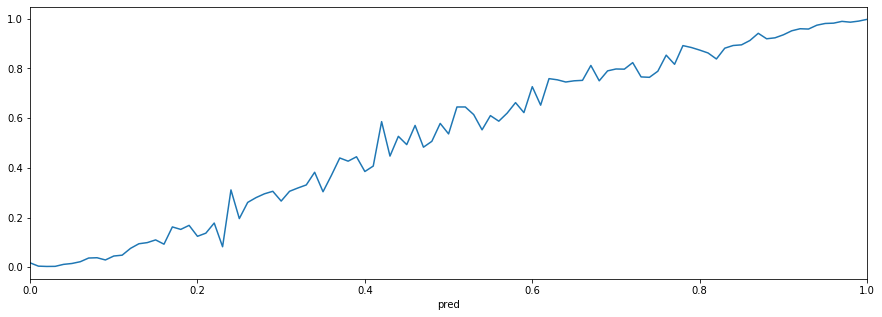

In [62]:
(1-risk_hist_df.risk).plot()

In [63]:
cm

array([[33916,  1105],
       [ 8427, 26247]])

In [64]:
dfx = df[df['value']]
p_f = len(dfx[dfx['value_real']]) / len(dfx)
p_r = cm[1,1] / (cm[1,1] + cm[0,1])
print('real prob', p_f , p_r, p_f * p_r)

real prob 0.7248322147651006 0.9596007604562737 0.6955495444917957


class_accuracy => accuracy:  0.5713397609944406 risk:  0.2804021088504726
optimistic_accuracy => risk:  0.0 min pass point:  0.999998
[[176844  77013]
 [245447 197639]]


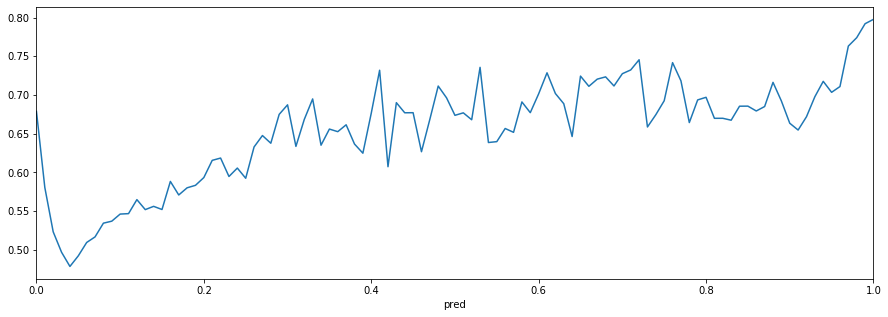

In [65]:
y_all_pred = classifier.predict(sc.transform(X))
y_f_price_real = df['value_real']
cm = confusion_matrix(y_f_price_real, (y_all_pred > 0.8))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_all_pred[:,0], y_f_price_real, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_all_pred[:,0], y_f_price_real)

print(cm)

(1-risk_hist_df.risk).plot()



0.7248322147651006
348064


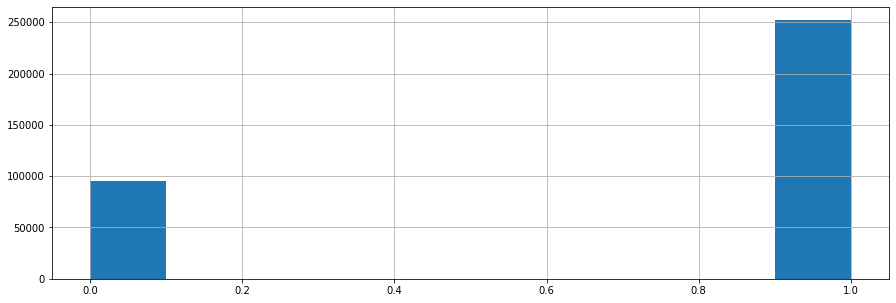

In [67]:
dfr = df[df['value']]
dfr['value_real'].astype(int).hist()
print(len(dfr[dfr['value_real']]) / (len(dfr)))
print(len(dfr['value_real']))

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.config.experimental.list_physical_devices()